# Summary Statistics & Visualization

wc -l /Users/shirley/Downloads/santander-product-recommendation/train_ver2.csv
13,647,310

## Load data

In [1]:
import numpy as np
import pandas as pd
import tqdm
from tableone import TableOne
import matplotlib.pyplot as plt
path = "/Users/shirley/Downloads/santander-product-recommendation/"

In [3]:
train = pd.read_csv(path+"train_ver2csv.zip",encoding="latin1", compression="zip", #nrows = 10000000,
                    dtype={"ncodpers":str,"sexo":str,'indrel_1mes':str,'cod_prov':str},)
train.head()

/var/folders/t6/n4z3tymj2yg72zy1pjtg4mxm0000gn/T/ipykernel_52479/2041143300.py:2: DtypeWarning: Columns (5,8,15) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(path+"train_ver2csv.zip",encoding="latin1", compression="zip", #nrows = 10000000,


,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [4]:
cols = ['fetch_date', 'cust_code', 'emp_index', 'country', 'sex', 'age', 'cust_date', 'new_cust', 'cust_seniority',
'indrel', 'last_date_as_primary', 'cust_type', 'cust_rel', 'residence_index', 'foreigner_index', 'spouse_index',
'joining_channel', 'deceased', 'address_type', 'prov_code','prov_name', 'activity_index', 'income', 'segmentation', 
'savings_account', 'guarentees', 'current_account', 'derivative_account', 'payroll_account', 'junior_account', 'mas_account',
'perticular_account', 'perticular_plus', 'st_deposit', 'mt_deposits', 'lt_deposits', 'e_account', 'funds', 'mortgage',
 'pension', 'loan', 'tax', 'credit_card', 'securities', 'home_account', 'payroll', 'pension2', 'direct_debit'
]
train.columns = cols
train

,fetch_date,cust_code,emp_index,country,sex,age,cust_date,new_cust,cust_seniority,indrel,...,mortgage,pension,loan,tax,credit_card,securities,home_account,payroll,pension2,direct_debit
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647304,2016-05-28,1166765,N,ES,V,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647305,2016-05-28,1166764,N,ES,V,23,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647306,2016-05-28,1166763,N,ES,H,47,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647307,2016-05-28,1166789,N,ES,H,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
 #   Column                Dtype  
---  ------                -----  
 0   fetch_date            object 
 1   cust_code             object 
 2   emp_index             object 
 3   country               object 
 4   sex                   object 
 5   age                   object 
 6   cust_date             object 
 7   new_cust              float64
 8   cust_seniority        object 
 9   indrel                float64
 10  last_date_as_primary  object 
 11  cust_type             object 
 12  cust_rel              object 
 13  residence_index       object 
 14  foreigner_index       object 
 15  spouse_index          object 
 16  joining_channel       object 
 17  deceased              object 
 18  address_type          float64
 19  prov_code             object 
 20  prov_name             object 
 21  activity_index        float64
 22  income                float64
 23  segme

In [5]:
train.age = pd.to_numeric(train.age,errors = 'coerce')
# train.spouse_index = pd.to_numeric(train.spouse_index,errors = 'coerce')

In [6]:
unique_ids = pd.Series(train["cust_code"].unique())
len(unique_ids)

956645

In [6]:
pd.Series(train['fetch_date'].unique())

0     2015-01-28
1     2015-02-28
2     2015-03-28
3     2015-04-28
4     2015-05-28
5     2015-06-28
6     2015-07-28
7     2015-08-28
8     2015-09-28
9     2015-10-28
10    2015-11-28
11    2015-12-28
12    2016-01-28
13    2016-02-28
14    2016-03-28
15    2016-04-28
16    2016-05-28
dtype: object

In [5]:
train.iloc[:,0:24].describe()

,age,new_cust,indrel,address_type,activity_index,income
count,1.361958e+07,1.361958e+07,1.361958e+07,13619574.0,1.361958e+07,1.085293e+07
mean,4.018146e+01,5.956184e-02,1.178399e+00,1.0,4.578105e-01,1.342543e+05
std,1.718509e+01,2.366733e-01,4.177469e+00,0.0,4.982169e-01,2.306202e+05
min,2.000000e+00,0.000000e+00,1.000000e+00,1.0,0.000000e+00,1.202730e+03
25%,2.400000e+01,0.000000e+00,1.000000e+00,1.0,0.000000e+00,6.871098e+04
50%,3.900000e+01,0.000000e+00,1.000000e+00,1.0,0.000000e+00,1.018500e+05
75%,5.000000e+01,0.000000e+00,1.000000e+00,1.0,1.000000e+00,1.559560e+05
max,1.640000e+02,1.000000e+00,9.900000e+01,1.0,1.000000e+00,2.889440e+07


In [5]:
pd.set_option('display.max_columns', 500)
train.iloc[:,24:].describe()

,savings_account,guarentees,current_account,derivative_account,payroll_account,junior_account,mas_account,perticular_account,perticular_plus,st_deposit,mt_deposits,lt_deposits,e_account,funds,mortgage,pension,loan,tax,credit_card,securities,home_account,payroll,pension2,direct_debit
count,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.363125e+07,1.363125e+07,1.364731e+07
mean,1.022912e-04,2.315475e-05,6.554837e-01,3.939238e-04,8.086722e-02,9.474175e-03,9.726606e-03,1.290083e-01,4.330583e-02,1.778739e-03,1.660987e-03,4.296679e-02,8.274357e-02,1.848599e-02,5.886582e-03,9.170965e-03,2.627404e-03,5.253636e-02,4.438868e-02,2.560761e-02,3.847718e-03,5.472434e-02,5.942854e-02,1.279162e-01
std,1.011340e-02,4.811883e-03,4.752103e-01,1.984361e-02,2.726311e-01,9.687320e-02,9.814275e-02,3.352091e-01,2.035447e-01,4.213757e-02,4.072135e-02,2.027823e-01,2.754942e-01,1.347006e-01,7.649791e-02,9.532502e-02,5.119083e-02,2.231060e-01,2.059571e-01,1.579616e-01,6.191053e-02,2.274414e-01,2.364250e-01,3.339965e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
#combination of these two
train.groupby(['fetch_date', 'cust_code']).size()[train.groupby(['fetch_date', 'cust_code']).size()>1]

Series([], dtype: int64)

fetch_date
2015-01-28    625457
2015-02-28    627394
2015-03-28    629209
2015-04-28    630367
2015-05-28    631957
2015-06-28    632110
2015-07-28    829817
2015-08-28    843201
2015-09-28    865440
2015-10-28    892251
2015-11-28    906109
2015-12-28    912021
2016-01-28    916269
2016-02-28    920904
2016-03-28    925076
2016-04-28    928274
2016-05-28    931453
dtype: int64


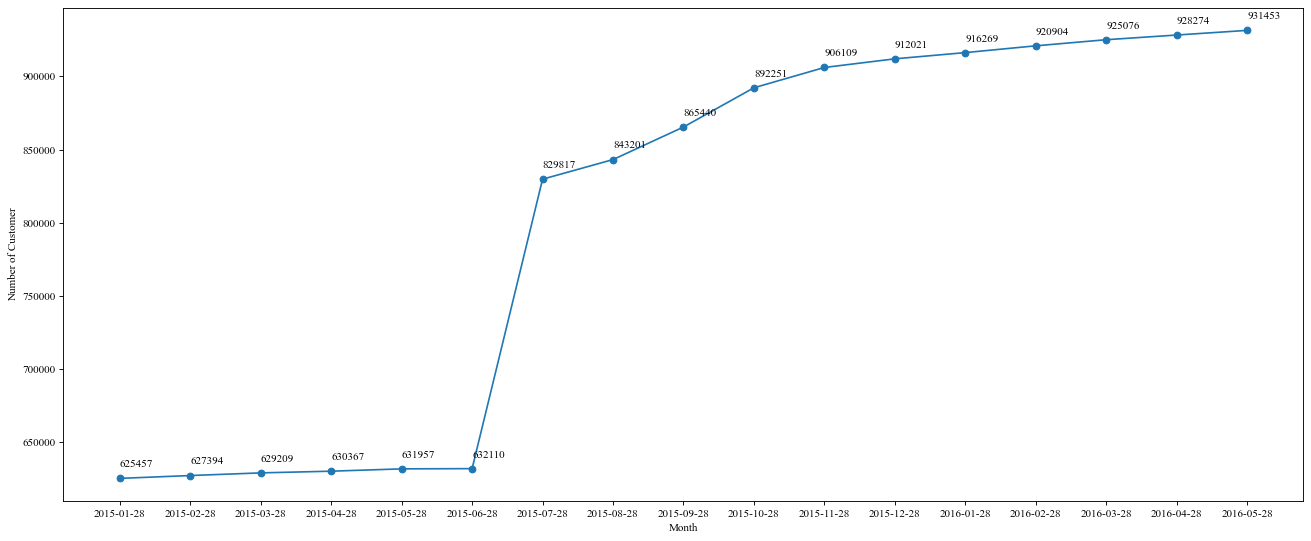

In [6]:
print(train.groupby(['fetch_date']).size())
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8), dpi=80)
plt.rcParams["font.family"] = "Times New Roman"
plt.plot(train.groupby(['fetch_date']).size(),marker='o')
plt.ylabel('Number of Customer',fontdict = {'family':'Times New Roman','color':'black'})
plt.xlabel("Month",fontdict = {'family':'Times New Roman','color':'black'})
x = train.groupby(['fetch_date']).size().index
y = train.groupby(['fetch_date']).size().values
for x,y in zip(x,y):
    label = int(y)
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='left') # horizontal alignment can be left, right or center
plt.savefig(path+'fetCustNum.png',bbox_inches='tight')
plt.show()

## check unique value for ids

In [7]:
category_col = []
for i in np.arange(0,48):
    uq_num = train.iloc[:,i].nunique()
    if uq_num<=13:
        print(train.columns[i], uq_num, ":     ",train.iloc[:,i].unique(), "          e.g.",train.iloc[:,i].unique()[0],train.iloc[:,i].unique()[1])
        category_col.append(train.columns[i])
    else:
        print(train.columns[i], uq_num, "          e.g.",train.iloc[:,i].unique()[0],train.iloc[:,i].unique()[1])  

fetch_date 17           e.g. 2015-01-28 2015-02-28
cust_code 956645           e.g. 1375586 1050611
emp_index 5 :      ['N' nan 'A' 'B' 'F' 'S']           e.g. N nan
country 118           e.g. ES nan
sex 2 :      ['H' 'V' nan]           e.g. H V
age 120           e.g. 35.0 23.0
cust_date 6756           e.g. 2015-01-12 2012-08-10
new_cust 2 :      [ 0. nan  1.]           e.g. 0.0 nan
cust_seniority 507           e.g.       6      35
indrel 2 :      [ 1. nan 99.]           e.g. 1.0 nan
last_date_as_primary 223           e.g. nan 2015-07-02
cust_type 9 :      ['1.0' '1' nan '3.0' '3' '2' '2.0' '4.0' 'P' '4']           e.g. 1.0 1
cust_rel 5 :      ['A' 'I' nan 'P' 'R' 'N']           e.g. A I
residence_index 2 :      ['S' nan 'N']           e.g. S nan
foreigner_index 2 :      ['N' 'S' nan]           e.g. N S
spouse_index 2 :      [nan 'N' 'S']           e.g. nan N
joining_channel 162           e.g. KHL KHE
deceased 2 :      ['N' nan 'S']           e.g. N nan
address_type 1 :      [ 1. nan]  

# ! change cust_seniority==-99999 to nan

In [8]:
train.cust_seniority = pd.to_numeric(train.cust_seniority,errors = 'coerce')
train.cust_seniority[train.cust_seniority==-9.99999e+05] = np.nan
print('cust_seniority', train['cust_seniority'].unique())

/var/folders/t6/n4z3tymj2yg72zy1pjtg4mxm0000gn/T/ipykernel_52479/1349697907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.cust_seniority[train.cust_seniority==-9.99999e+05] = np.nan


cust_seniority [  6.  35.  34.  nan  33.  31.  21.  16.  27.   9.  22.  13.  29.   8.
  11.  10.  28.  24.   7.  25.  14.  26.  12.  23.   1.  18.   4.   3.
  17.  32.  30.  20.  15.  19. 157.  36.   5.  40.  38.  37.  39.   0.
   2.  47.  44.  42.  46.  45.  43.  41.  57.  48.  52.  49.  50.  56.
  58.  51.  55.  54.  53.  59.  62.  61.  60.  63. 139. 165. 118. 164.
 142.  94. 159. 143. 105. 151. 162. 137. 150. 128. 122. 156. 119. 160.
  79.  95. 132. 161.  98. 127.  72. 155. 108. 163. 102. 148. 115. 146.
 107.  81. 216. 135.  92. 121. 198. 134.  93. 140. 110. 120. 147. 116.
  64.  77.  85.  99.  78. 100. 113. 154. 166. 133. 124. 141.  66. 117.
  86. 193.  80. 144.  87. 126. 158. 101. 235.  88. 145. 103. 149. 109.
 131.  97.  68.  84. 232. 125. 177. 112.  96.  69. 171. 167. 104.  76.
  82. 152.  70. 138. 169.  65. 129. 190. 114. 111. 176. 153.  89. 136.
  83. 123. 187. 106. 231. 189. 217. 172. 199. 173. 174. 209. 180. 178.
  91. 168. 130. 225.  67.  73. 183.  74. 206.  71. 179. 184. 1

In [9]:
# change seg
train.segmentation[train.segmentation=='01 - TOP'] = 1
train.segmentation[train.segmentation=='02 - PARTICULARES'] = 2
train.segmentation[train.segmentation=='03 - UNIVERSITARIO'] = 3

/var/folders/t6/n4z3tymj2yg72zy1pjtg4mxm0000gn/T/ipykernel_52479/1071598212.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.segmentation[train.segmentation=='01 - TOP'] = 1
/var/folders/t6/n4z3tymj2yg72zy1pjtg4mxm0000gn/T/ipykernel_52479/1071598212.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.segmentation[train.segmentation=='02 - PARTICULARES'] = 2
/var/folders/t6/n4z3tymj2yg72zy1pjtg4mxm0000gn/T/ipykernel_52479/1071598212.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [10]:
# change cust_type
train.cust_type[train.cust_type=='1.0'] = "1"
train.cust_type[train.cust_type=='2.0'] = "2"
train.cust_type[train.cust_type=='3.0'] = "3"
train.cust_type[train.cust_type=='4.0'] = "4"

/var/folders/t6/n4z3tymj2yg72zy1pjtg4mxm0000gn/T/ipykernel_52479/1169813410.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.cust_type[train.cust_type=='1.0'] = "1"
/var/folders/t6/n4z3tymj2yg72zy1pjtg4mxm0000gn/T/ipykernel_52479/1169813410.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.cust_type[train.cust_type=='2.0'] = "2"
/var/folders/t6/n4z3tymj2yg72zy1pjtg4mxm0000gn/T/ipykernel_52479/1169813410.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [12]:
from tableone import TableOne
columns = ['emp_index', 'sex', 'age', 'new_cust', 'cust_seniority',
'indrel', 'cust_type', 'cust_rel', 'residence_index', 'foreigner_index'
]
category_col1 = category_col[:8]
mytable = TableOne(train,categorical=category_col1,columns=columns)
mytable.to_latex(path+'tables1.tex')
columns = ['spouse_index','deceased', 'address_type', 'activity_index', 'income', 'segmentation', 
'savings_account', 'guarentees', 'current_account', 'derivative_account', 'payroll_account', 'junior_account', 'mas_account',
'perticular_account', 'perticular_plus']
category_col1 = category_col[8:22]
mytable = TableOne(train,categorical=category_col1,columns=columns)
mytable.to_latex(path+'tables2.tex')
columns = ['st_deposit', 'mt_deposits', 'lt_deposits', 'e_account', 'funds', 'mortgage',
 'pension', 'loan', 'tax', 'credit_card', 'securities', 'home_account', 'payroll', 'pension2', 'direct_debit']
category_col1 = category_col[22:]
mytable = TableOne(train,categorical=category_col1,columns=columns)
mytable.to_latex(path+'tables3.tex')

/var/folders/t6/n4z3tymj2yg72zy1pjtg4mxm0000gn/T/ipykernel_53163/3350748432.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  mytable.to_latex(path+'tables1.tex')
/var/folders/t6/n4z3tymj2yg72zy1pjtg4mxm0000gn/T/ipykernel_53163/3350748432.py:13: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  mytable.to_latex(path+'tables2.tex')
/var/folders/t6/n4z3tymj2yg72zy1pjtg4mxm0000gn/T/ipykernel_53163/3350748432.py:18: FutureWarning: In future versions `DataFrame.to_latex` is expect

# modify the dataset

### user file

In [56]:
df_user = train[['fetch_date', 'cust_code', 'emp_index', 'country', 'sex', 'age', 'cust_date', 'new_cust', 'cust_seniority',
'indrel', 'last_date_as_primary', 'cust_type', 'cust_rel', 'residence_index', 'foreigner_index', 'spouse_index',
'joining_channel', 'deceased', 'address_type', 'prov_code','prov_name', 'activity_index', 'income', 'segmentation']]
df_user.sort_values(by=['cust_code','fetch_date'],inplace=True)

/var/folders/t6/n4z3tymj2yg72zy1pjtg4mxm0000gn/T/ipykernel_53163/1401713671.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user.sort_values(by=['cust_code','fetch_date'],inplace=True)


In [14]:
print(len(df_user['cust_code'].unique()))
df_user.groupby(['cust_code']).size()[df_user.groupby(['cust_code']).size()>1]

956645


cust_code
  15889    17
  15890    17
  15891     2
  15892    17
  15893    17
           ..
1548202     2
1548203     2
1548204     2
1548206     2
1548207     2
Length: 946173, dtype: int64

In [15]:
# check customer features uniqueness
features = ['emp_index', 'country', 'sex', 'age', 'cust_date', 'new_cust', 'cust_seniority',
'indrel', 'last_date_as_primary', 'cust_type', 'cust_rel', 'residence_index', 'foreigner_index', 'spouse_index',
'joining_channel', 'deceased', 'address_type', 'prov_code','prov_name', 'activity_index', 'income', 'segmentation']

for feat in features:
    a = df_user.drop_duplicates(subset=['cust_code',feat])[['cust_code',feat]]
    a = a.dropna(subset=[feat])
    la = len(a.groupby(['cust_code']).size()[a.groupby(['cust_code']).size()>1])
    if la:
        print(feat)
        print(la)
        print(a.groupby(['cust_code']).size()[a.groupby(['cust_code']).size()>1].tail())
        print("-"*10)
    else:
        print(feat,"ok")
        print("-"*10)

emp_index ok
----------
country
106
cust_code
1468487    2
1472391    2
1508801    2
1519831    2
1542679    2
dtype: int64
----------
sex
46
cust_code
1445017    2
1457392    2
1459058    2
1463211    2
1499273    2
dtype: int64
----------
age
746937
cust_code
1548142    2
1548156    2
1548180    2
1548181    2
1548186    2
dtype: int64
----------
cust_date
17
cust_code
1468910    2
1489811    2
1518961    2
1534231    2
1542479    2
dtype: int64
----------
new_cust
113156
cust_code
1544548    2
1544643    2
1544973    2
1545356    2
1545788    2
dtype: int64
----------
cust_seniority
937779
cust_code
1548202    2
1548203    2
1548204    2
1548206    2
1548207    2
dtype: int64
----------
indrel
14273
cust_code
1548136    2
1548141    2
1548158    2
1548177    2
1548192    2
dtype: int64
----------
last_date_as_primary
168
cust_code
1534122    2
1538415    2
1542008    2
1542376    2
1542940    2
dtype: int64
----------
cust_type
5750
cust_code
1541426    2
1542164    2
1542842    2
1

In [134]:
#  country change
df_user[df_user['cust_code']=='1542679']

,fetch_date,cust_code,emp_index,country,sex,age,cust_date,new_cust,cust_seniority,indrel,last_date_as_primary,cust_type,cust_rel,residence_index,foreigner_index,spouse_index,joining_channel,deceased,address_type,prov_code,prov_name,activity_index,income,segmentation
11927433,2016-04-28,1542679,N,ES,V,64.0,2016-03-31,1.0,0.0,1.0,NaN,1,A,S,N,NaN,KHM,N,1.0,7,"BALEARS, ILLES",1.0,NaN,2
13329273,2016-05-28,1542679,N,US,V,64.0,2016-03-31,1.0,2.0,1.0,NaN,1,I,N,N,NaN,KHM,N,1.0,NaN,NaN,1.0,NaN,2


In [ ]:
a = df_user.drop_duplicates(subset=['cust_code','sex'])[['cust_code','sex']]
a = a.dropna(subset=['sex'])
b=df_user[df_user['cust_code'].isin((a.groupby(['cust_code']).size()[a.groupby(['cust_code']).size()>1]).index)]

a = df_user.drop_duplicates(subset=['cust_code','emp_index'])[['cust_code','emp_index']]
a = a.dropna(subset=['emp_index'])
len(a.groupby(['cust_code']).size()[a.groupby(['cust_code']).size()>1])

In [138]:
# check primary key
df_user.groupby(['fetch_date', 'cust_code']).size()[df_user.groupby(['fetch_date', 'cust_code']).size()>1]

Series([], dtype: int64)

In [57]:
# fill na for customer if it is unknown at first, but known later
# check customer features uniqueness
features = ['emp_index', 'country', 'sex', 'age', 'cust_date', 'new_cust', 'cust_seniority',
'indrel', 'last_date_as_primary', 'cust_type', 'cust_rel', 'residence_index', 'foreigner_index', 'spouse_index',
'joining_channel', 'deceased', 'address_type', 'prov_code','prov_name', 'activity_index', 'income', 'segmentation']
import tqdm
for feat in tqdm.tqdm(features):
    df_user[feat]=df_user.groupby(['cust_code'])[feat].bfill()
    df_user[feat]=df_user.groupby(['cust_code'])[feat].ffill()
print(len(df_user['cust_code'].unique()))

  0%|          | 0/22 [00:00<?, ?it/s]/var/folders/t6/n4z3tymj2yg72zy1pjtg4mxm0000gn/T/ipykernel_53163/1388720584.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user[feat]=df_user.groupby(['cust_code'])[feat].bfill()
/var/folders/t6/n4z3tymj2yg72zy1pjtg4mxm0000gn/T/ipykernel_53163/1388720584.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user[feat]=df_user.groupby(['cust_code'])[feat].ffill()
  5%|▍         | 1/22 [00:37<13:09, 37.59s/it]/var/folders/t6/n4z3tymj2yg72zy1pjtg4mxm0000gn/T/ipyke

956645


In [58]:
user_summary = df_user.sort_values(by="fetch_date").drop_duplicates(subset=["cust_code"], keep="last")

# User Description Table

In [59]:
columns = ['emp_index', 'sex', 'age', 'new_cust', 'cust_seniority',
'indrel', 'cust_type', 'cust_rel', 'residence_index', 'foreigner_index', 'spouse_index','deceased', 'address_type', 'activity_index', 'income', 'segmentation']
category_col1 = ['emp_index', 'sex', 'new_cust', 
'indrel', 'cust_type', 'cust_rel', 'residence_index', 'foreigner_index', 'spouse_index','deceased', 'address_type', 'activity_index','segmentation']

mytable = TableOne(user_summary,categorical=category_col1,columns=columns)
mytable.to_latex(path+'tab_user1.tex')
pd.set_option('display.max_rows', 500)
mytable

/var/folders/t6/n4z3tymj2yg72zy1pjtg4mxm0000gn/T/ipykernel_53163/1906493023.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  mytable.to_latex(path+'tab_user1.tex')


Missing              Overall
n                                                    956645
emp_index, n (%)          A       7031            148 (0.0)
                          B                       219 (0.0)
                          F                       152 (0.0)
                          N                   949094 (99.9)
                          S                         1 (0.0)
sex, n (%)                H       7036        434037 (45.7)
                          V                   515572 (54.3)
age, mean (SD)                    7031          40.2 (17.2)
new_cust, n (%)           0.0     7031        906393 (95.4)
                          1.0                   43221 (4.6)
cust_seniority, mean (SD)         7033          79.0 (67.3)
indrel, n (%)             1.0     7031        930285 (98.0)
                          99.0                  19329 (2.0)
cust_type, n (%)          1      14686        940943 (99.9)
                          2                       131 (0.0)
                          3                       747 (0.1)
                          4                        37 (0.0)
                          P                       101 (0.0)
cust_rel, n (%)           A      14686        400106 (42.5)
                          I                   540968 (57.4)
                          P                       784 (0.1)
                          R                       101 (0.0)
residence_index, n (%)    N       7031           4018 (0.4)
                          S                   945596 (99.6)
foreigner_index, n (%)    N       7031        902024 (95.0)
                          S                     47590 (5.0)
spouse_index, n (%)       N     956357           287 (99.7)
                          S                         1 (0.3)
deceased, n (%)           N       7031        946884 (99.7)
                          S                      2730 (0.3)
address_type, n (%)       1.0     7031       949614 (100.0)
activity_index, n (%)     0.0     7031        552639 (58.2)
                          1.0                 396975 (41.8)
income, mean (SD)               247234  134096.4 (232281.2)
segmentation, n (%)       1      18374          36034 (3.8)
                          2                   551740 (58.8)
                          3                   350497 (37.4)

## Additional Account

In [60]:
a = train.drop_duplicates(subset=['cust_code','sex'])[['cust_code','sex']]
b = (a.groupby(['cust_code']).size()[a.groupby(['cust_code']).size()==1]).index
c = a.iloc[np.where(a['sex'].isnull())[0],:].cust_code
d = train[(train['cust_code'].isin(b))&(train['cust_code'].isin(c))]
del(a)
del(b)
del(c)
del(d)

In [12]:

# fill na for customer if it is unknown at first, but known later
# check customer features uniqueness
features = ['emp_index', 'country', 'sex', 'age', 'cust_date', 'new_cust', 'cust_seniority',
'indrel', 'last_date_as_primary', 'cust_type', 'cust_rel', 'residence_index', 'foreigner_index', 'spouse_index',
'joining_channel', 'deceased', 'address_type', 'prov_code','prov_name', 'activity_index', 'income', 'segmentation']
import tqdm
for feat in tqdm.tqdm(features):
    train[feat]=train.groupby(['cust_code'])[feat].bfill()
    train[feat]=train.groupby(['cust_code'])[feat].ffill()

100%|██████████| 22/22 [05:19<00:00, 14.53s/it]


In [18]:
train.sort_values(by=['cust_code','fetch_date'],inplace=True)
ys = ['savings_account', 'guarentees', 'current_account', 'derivative_account', 'payroll_account', 'junior_account', 'mas_account',
'perticular_account', 'perticular_plus', 'st_deposit', 'mt_deposits', 'lt_deposits', 'e_account', 'funds', 'mortgage',
 'pension', 'loan', 'tax', 'credit_card', 'securities', 'home_account', 'payroll', 'pension2', 'direct_debit'
]
for y in tqdm.tqdm(ys):
    train['l_'+y] = train.groupby(['cust_code'])[y].shift(1)
    train['new_'+y] = 0
    train.loc[(train['l_'+y]==0)&(train[y]==1),'new_'+y] = 1
    train.drop(['l_'+y],axis=1,inplace=True)

100%|██████████| 24/24 [16:04<00:00, 40.17s/it]


In [19]:
train.columns

Index(['fetch_date', 'cust_code', 'emp_index', 'country', 'sex', 'age',
       'cust_date', 'new_cust', 'cust_seniority', 'indrel',
       'last_date_as_primary', 'cust_type', 'cust_rel', 'residence_index',
       'foreigner_index', 'spouse_index', 'joining_channel', 'deceased',
       'address_type', 'prov_code', 'prov_name', 'activity_index', 'income',
       'segmentation', 'savings_account', 'guarentees', 'current_account',
       'derivative_account', 'payroll_account', 'junior_account',
       'mas_account', 'perticular_account', 'perticular_plus', 'st_deposit',
       'mt_deposits', 'lt_deposits', 'e_account', 'funds', 'mortgage',
       'pension', 'loan', 'tax', 'credit_card', 'securities', 'home_account',
       'payroll', 'pension2', 'direct_debit', 'new_savings_account',
       'new_guarentees', 'new_current_account', 'new_derivative_account',
       'new_payroll_account', 'new_junior_account', 'new_mas_account',
       'new_perticular_account', 'new_perticular_plus', 'new_s

In [21]:
pd.set_option('display.max_columns', 500)
train

,fetch_date,cust_code,emp_index,country,sex,age,cust_date,new_cust,cust_seniority,indrel,last_date_as_primary,cust_type,cust_rel,residence_index,foreigner_index,spouse_index,joining_channel,deceased,address_type,prov_code,prov_name,activity_index,income,segmentation,savings_account,guarentees,current_account,derivative_account,payroll_account,junior_account,mas_account,perticular_account,perticular_plus,st_deposit,mt_deposits,lt_deposits,e_account,funds,mortgage,pension,loan,tax,credit_card,securities,home_account,payroll,pension2,direct_debit,new_savings_account,new_guarentees,new_current_account,new_derivative_account,new_payroll_account,new_junior_account,new_mas_account,new_perticular_account,new_perticular_plus,new_st_deposit,new_mt_deposits,new_lt_deposits,new_e_account,new_funds,new_mortgage,new_pension,new_loan,new_tax,new_credit_card,new_securities,new_home_account,new_payroll,new_pension2,new_direct_debit
416965,2015-01-28,15889,F,ES,V,56.0,1995-01-16,0.0,245.0,1.0,NaN,1,A,S,N,N,KAT,N,1.0,28,MADRID,1.0,326124.9,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
836224,2015-02-28,15889,F,ES,V,56.0,1995-01-16,0.0,245.0,1.0,NaN,1,A,S,N,N,KAT,N,1.0,28,MADRID,1.0,326124.9,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1673961,2015-03-28,15889,F,ES,V,56.0,1995-01-16,0.0,245.0,1.0,NaN,1,A,S,N,N,KAT,N,1.0,28,MADRID,1.0,326124.9,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1882060,2015-04-28,15889,F,ES,V,56.0,1995-01-16,0.0,245.0,1.0,NaN,1,A,S,N,N,KAT,N,1.0,28,MADRID,1.0,326124.9,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3144382,2015-05-28,15889,F,ES,V,56.0,1995-01-16,0.0,245.0,1.0,NaN,1,A,S,N,N,KAT,N,1.0,28,MADRID,1.0,326124.9,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13336818,2016-05-28,1553685,N,ES,V,52.0,2016-05-31,1.0,0.0,1.0,NaN,NaN,NaN,S,N,NaN,NaN,N,1.0,13,CIUDAD REAL,0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13336817,2016-05-28,1553686,N,ES,H,30.0,2016-05-31,1.0,0.0,1.0,NaN,NaN,NaN,S,S,NaN,NaN,N,1.0,41,SEVILLA,0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13336816,2016-05-28,1553687,N,ES,V,21.0,2016-05-31,1.0,0.0,1.0,NaN,NaN,NaN,S,N,NaN,NaN,N,1.0,28,MADRID,0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13336815,2016-05-28,1553688,N,ES,H,43.0,2016-05-31,1.0,0.0,1.0,NaN,NaN,NaN,S,N,NaN,NaN,N,1.0,39,CANTABRIA,0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
train.to_pickle(path+'train_cleaned.pcl')

# Inspect Each Variable

In [2]:
train=pd.read_pickle(path+'train_cleaned.pcl')

# checkings

In [3]:
train  = train[~train.fetch_date.isin(['2015-01-28'])]
ys = ['savings_account', 'guarentees', 'current_account', 'derivative_account', 'payroll_account', 'junior_account', 'mas_account',
'perticular_account', 'perticular_plus', 'st_deposit', 'mt_deposits', 'lt_deposits', 'e_account', 'funds', 'mortgage',
 'pension', 'loan', 'tax', 'credit_card', 'securities', 'home_account', 'payroll', 'pension2', 'direct_debit']
for y in ys:
    train.drop([y],axis=1,inplace=True)

In [ ]:
ys = ['savings_account', 'guarentees', 'current_account', 'derivative_account', 'payroll_account', 'junior_account', 'mas_account',
'perticular_account', 'perticular_plus']
new_ys = ['new_'+y for y in ys]
mytable = TableOne(train,columns = new_ys,categorical=new_ys)
mytable.to_latex(path+'target_y_1.tex')

In [5]:
ys = ['st_deposit', 'mt_deposits', 'lt_deposits', 'e_account', 'funds', 'mortgage',
 'pension', 'loan', 'tax', 'credit_card', 'securities', 'home_account', 'payroll', 'pension2', 'direct_debit']
new_ys = ['new_'+y for y in ys]
mytable = TableOne(train,columns = new_ys,categorical=new_ys)
mytable.to_latex(path+'target_y_2.tex')

/var/folders/t6/n4z3tymj2yg72zy1pjtg4mxm0000gn/T/ipykernel_63672/398103000.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  mytable.to_latex(path+'target_y_2.tex')


In [6]:
def group_table(y):
    columns = ['emp_index', 'sex', 'age', 'new_cust', 'cust_seniority','indrel', 'cust_type', 'cust_rel',
               'residence_index', 'foreigner_index', 'spouse_index','deceased', 'address_type', 
               'activity_index', 'income', 'segmentation']
    category_col2 = ['emp_index', 'sex', 'new_cust','indrel', 'cust_type', 'cust_rel',
               'residence_index', 'foreigner_index', 'spouse_index','deceased', 'address_type', 
               'activity_index', 'segmentation']
    mytable = TableOne(train,columns = columns,categorical=category_col2,groupby = [y])
    mytable.to_latex(path+'tab_'+y+'.tex')
    return(mytable)
# for col in tqdm.tqdm(new_ys):
#     group_table(col)

# other

## fetch_date

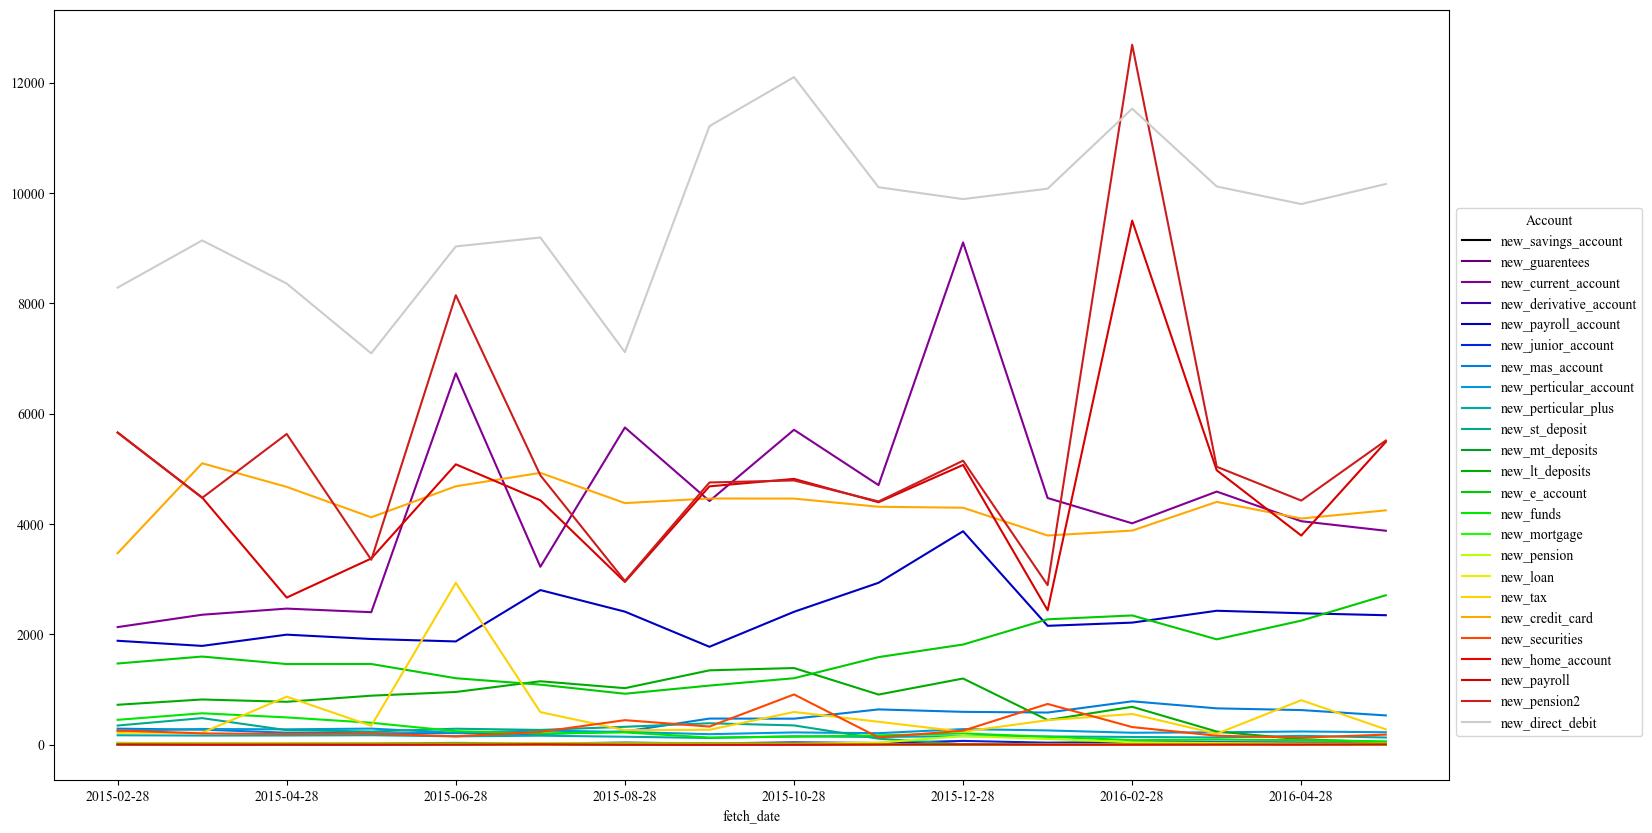

In [60]:
ys = ['savings_account', 'guarentees', 'current_account', 'derivative_account', 'payroll_account', 'junior_account', 'mas_account',
'perticular_account', 'perticular_plus','st_deposit', 'mt_deposits', 'lt_deposits', 'e_account', 'funds', 'mortgage',
 'pension', 'loan', 'tax', 'credit_card', 'securities', 'home_account', 'payroll', 'pension2', 'direct_debit']
new_ys = ['new_'+y for y in ys]
# plotting number of purchases in each month
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
add_account_sum = train[['fetch_date']+new_ys].groupby('fetch_date').sum()
add_account_sum.plot(kind='line',colormap='nipy_spectral',figsize=(18,10))
plt.legend(loc='center left', title='Account', bbox_to_anchor=(1, 0.4))
plt.savefig(path+'add_date_line.png',bbox_inches='tight')
plt.show()

In [18]:
add_account_sum

,new_savings_account,new_guarentees,new_current_account,new_derivative_account,new_payroll_account,new_junior_account,new_mas_account,new_perticular_account,new_perticular_plus,new_st_deposit,...,new_mortgage,new_pension,new_loan,new_tax,new_credit_card,new_securities,new_home_account,new_payroll,new_pension2,new_direct_debit
fetch_date,,,,,,,,,,,,,,,,,,,,,
2015-02-28,1,1,2132,12,1884,7,291,249,171,348,...,5,27,9,217,3471,259,8,5659,5656,8285
2015-03-28,0,1,2356,15,1791,18,273,285,166,482,...,7,24,12,217,5101,205,4,4480,4474,9140
2015-04-28,0,1,2467,12,1995,10,218,279,167,264,...,4,22,17,871,4673,194,5,2667,5632,8358
2015-05-28,0,0,2402,7,1916,11,207,292,172,239,...,9,21,11,343,4122,202,4,3375,3352,7093
2015-06-28,0,0,6731,9,1872,8,211,216,152,290,...,4,19,8,2933,4684,152,3,5082,8147,9031
2015-07-28,0,0,3225,10,2803,24,192,257,164,268,...,6,27,5,591,4927,232,9,4430,4883,9193
2015-08-28,0,0,5750,10,2412,37,240,231,145,325,...,1,22,13,264,4379,445,2,2950,2968,7115
2015-09-28,0,0,4417,7,1775,22,474,191,122,389,...,8,21,13,271,4463,329,2,4683,4753,11211
2015-10-28,0,0,5708,3,2409,43,472,223,153,350,...,7,19,9,593,4461,911,2,4818,4790,12100


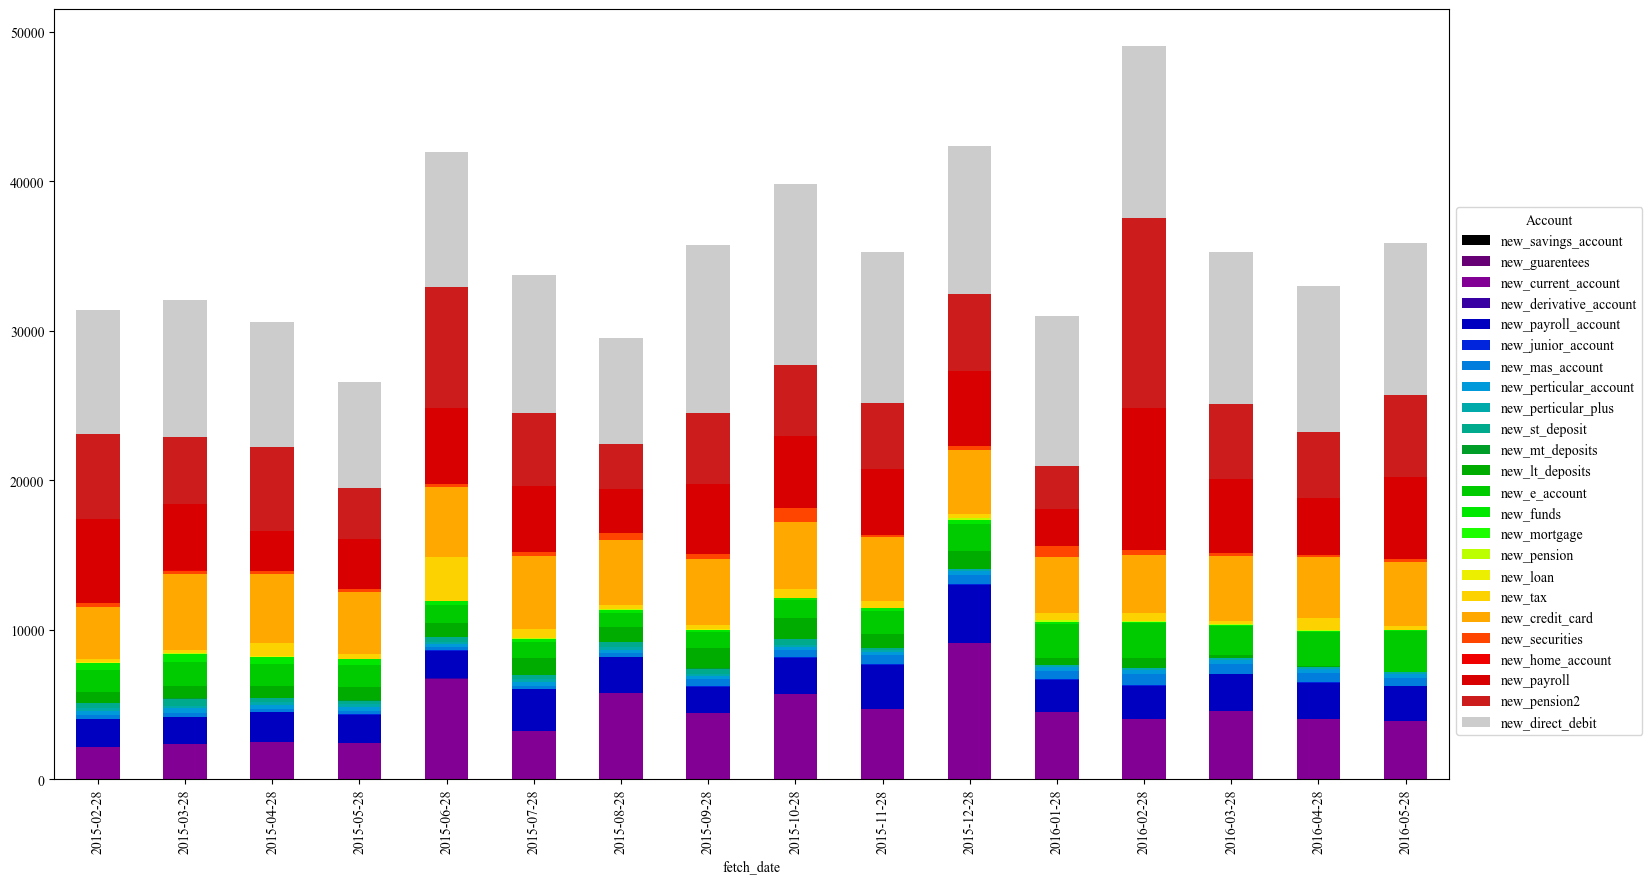

In [24]:
plt.rcParams["font.family"] = "Times New Roman"
add_account_sum = train[['fetch_date']+new_ys].groupby('fetch_date').sum()
add_account_sum.plot(kind='bar',stacked=True, colormap='nipy_spectral',figsize=(18,10))
plt.legend(loc='center left', title='Account', bbox_to_anchor=(1, 0.4))
plt.savefig(path+'add_date_bar.png',bbox_inches='tight')
plt.show()

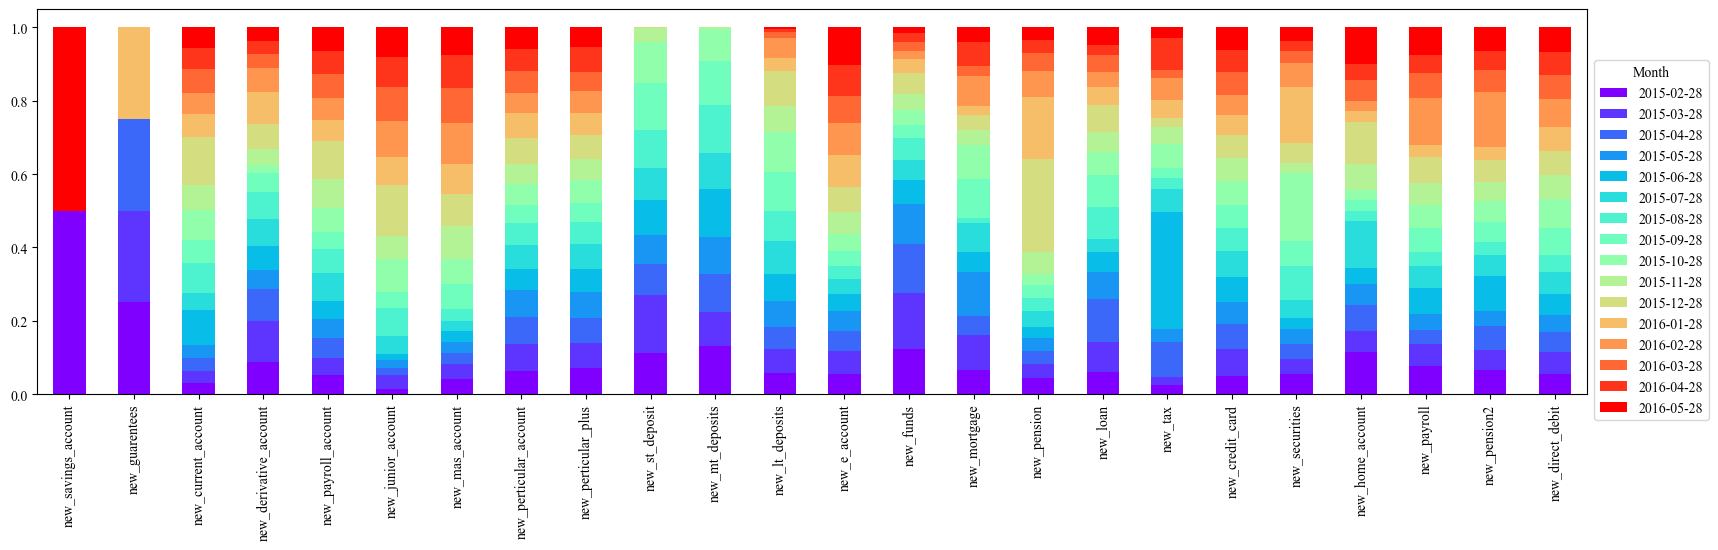

In [25]:
#Plotting the distribution of products in each month
add_account_sum = add_account_sum/add_account_sum.sum()
add_account_sum.T.plot(kind='bar',stacked=True, colormap='rainbow',figsize=(20,5))
plt.legend(loc='center left', title='Month', bbox_to_anchor=(1, .4))
plt.savefig(path+'add_acc_.png',bbox_inches='tight')
plt.show()

## emp_index

In [20]:
import seaborn as sn
ys = ['savings_account', 'guarentees', 'current_account', 'derivative_account', 'payroll_account', 'junior_account', 'mas_account',
'perticular_account', 'perticular_plus','st_deposit', 'mt_deposits', 'lt_deposits', 'e_account', 'funds', 'mortgage',
 'pension', 'loan', 'tax', 'credit_card', 'securities', 'home_account', 'payroll', 'pension2', 'direct_debit']
new_ys = ['new_'+y for y in ys]

def miss(variab):
    df = pd.DataFrame(columns=['var','missing_0','missing_1', 'pct_0(%)', 'pct_1(%)'])
    df.loc[len(df.index)] = ['total',
                              len(train[variab][train[variab].isna()]),
                              np.nan,
                              round((len(train[variab][train[variab].isna()])/len(train[variab]))*100,2),
                              np.nan] 
    for y in tqdm.tqdm(new_ys):
        train_y0 = train[train[y]==0]
        train_y1 = train[train[y]==1]
        df.loc[len(df.index)] = [y,
                              int(len(train_y0[variab][train_y0[variab].isna()])),
                              int(len(train_y1[variab][train_y1[variab].isna()])),
                              round((len(train_y0[variab][train_y0[variab].isna()])/len(train_y0[variab]))*100,2),
                              round((len(train_y1[variab][train_y1[variab].isna()])/len(train_y1[variab]))*100,2)]
    df.to_latex(path+'miss_'+variab+'.tex')
    return(df)

def dist(variab):
    df = pd.DataFrame(columns=['var','y=0','y=1', 'y=0(%)', 'y=1(%)'])
    uniq = train[variab].unique()
    for u in uniq:
        df.loc[len(df.index)] = ['total',
                              len(train[variab][train[variab]==u]),
                              np.nan,
                              round((len(train[variab][train[variab]==u])/len(train[variab]))*100,2),
                              np.nan] 
    for y in tqdm.tqdm(new_ys):
        train_y0 = train[train[y]==0]
        train_y1 = train[train[y]==1]
        for u in uniq:
            df.loc[len(df.index)] = [y,
                                int(len(train_y0[variab][train_y0[variab]==u])),
                                int(len(train_y1[variab][train_y1[variab]==u])),
                                round((len(train_y0[variab][train_y0[variab]==u])/len(train_y0[variab]))*100,2),
                                round((len(train_y1[variab][train_y1[variab]==u])/len(train_y1[variab]))*100,2)]
    df.to_latex(path+'dist_'+variab+'.tex')
    return(df)


def bar_plot(variab,user_uni=True):
    if user_uni == True:
        data_source = train.drop_duplicates(subset=['cust_code'],keep="last")
    else:
        data_source = train
    plt.rcParams["font.family"] = "Times New Roman"
    plt.bar(data_source.groupby([variab]).size().index, data_source.groupby([variab]).size().values, color="royalblue")
    plt.savefig(path+'v_'+variab+'bar.png',bbox_inches='tight')
    plt.show()

def pie_plot(variab,user_uni = True):
    if user_uni == True:
        data_source = train.drop_duplicates(subset=['cust_code'],keep="last")[variab]
    else:
        data_source = train[variab]
    plt.rcParams["font.family"] = "Times New Roman"
    data_source.value_counts().plot(kind='pie', autopct='%1.2f%%')
    plt.legend()
    plt.savefig(path+'v_'+variab+'pie.png',bbox_inches='tight')
    plt.show()

def plot_stat(variab, user_uni = True, bins=20):
    if user_uni == True:
        data_source = train.drop_duplicates(subset=['cust_code'],keep="last")[variab]
    else:
        data_source = train[variab]
    print(data_source.describe())
    plt.rcParams["font.family"] = "Times New Roman"
    sn.distplot(data_source, hist=True, bins=bins, kde=True, kde_kws={'bw':.2})
    plt.axvline(data_source.mean(),color='darkblue',label='Mean')    
    plt.axvline(np.median(data_source),color='blue',label='Median')
    plt.axvline(data_source.max(),color='green',label='Max')
    plt.axvline(data_source.min(),color='red',label='Min')
    plt.axvline(np.nanquantile(data_source, 0.25),color='orange',label='First quartile - 25%')
    plt.axvline(np.nanquantile(data_source, 0.75),color='purple',label='Third quartile - 75%')
    plt.legend()
    plt.savefig(path+'v_'+variab+'stat.png',bbox_inches='tight')
    plt.show()

In [27]:
miss('emp_index')

100%|██████████| 24/24 [21:55<00:00, 54.81s/it]
/var/folders/t6/n4z3tymj2yg72zy1pjtg4mxm0000gn/T/ipykernel_63672/1603566103.py:16: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex(path+'miss_'+variab+'.tex')


,var,missing_0,missing_1,pct_0(%),pct_1(%)
0,total,20012,NaN,0.15,NaN
1,new_savings_account,20012,0.0,0.15,0.00
2,new_guarentees,20012,0.0,0.15,0.00
3,new_current_account,19893,119.0,0.15,0.17
4,new_derivative_account,20011,1.0,0.15,0.74
5,new_payroll_account,19998,14.0,0.15,0.04
6,new_junior_account,20011,1.0,0.15,0.20
7,new_mas_account,20002,10.0,0.15,0.14
8,new_perticular_account,20006,6.0,0.15,0.15
9,new_perticular_plus,20011,1.0,0.15,0.04


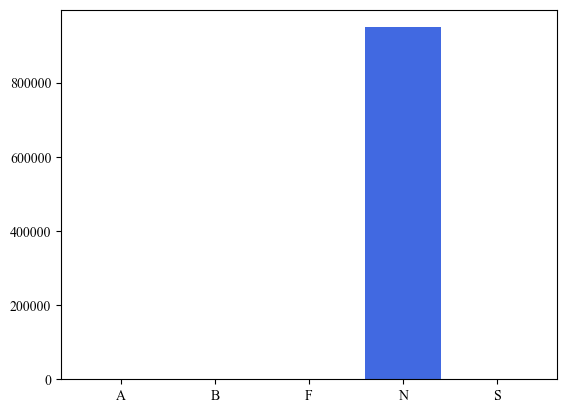

In [11]:
bar_plot('emp_index')
# dist('emp_index')

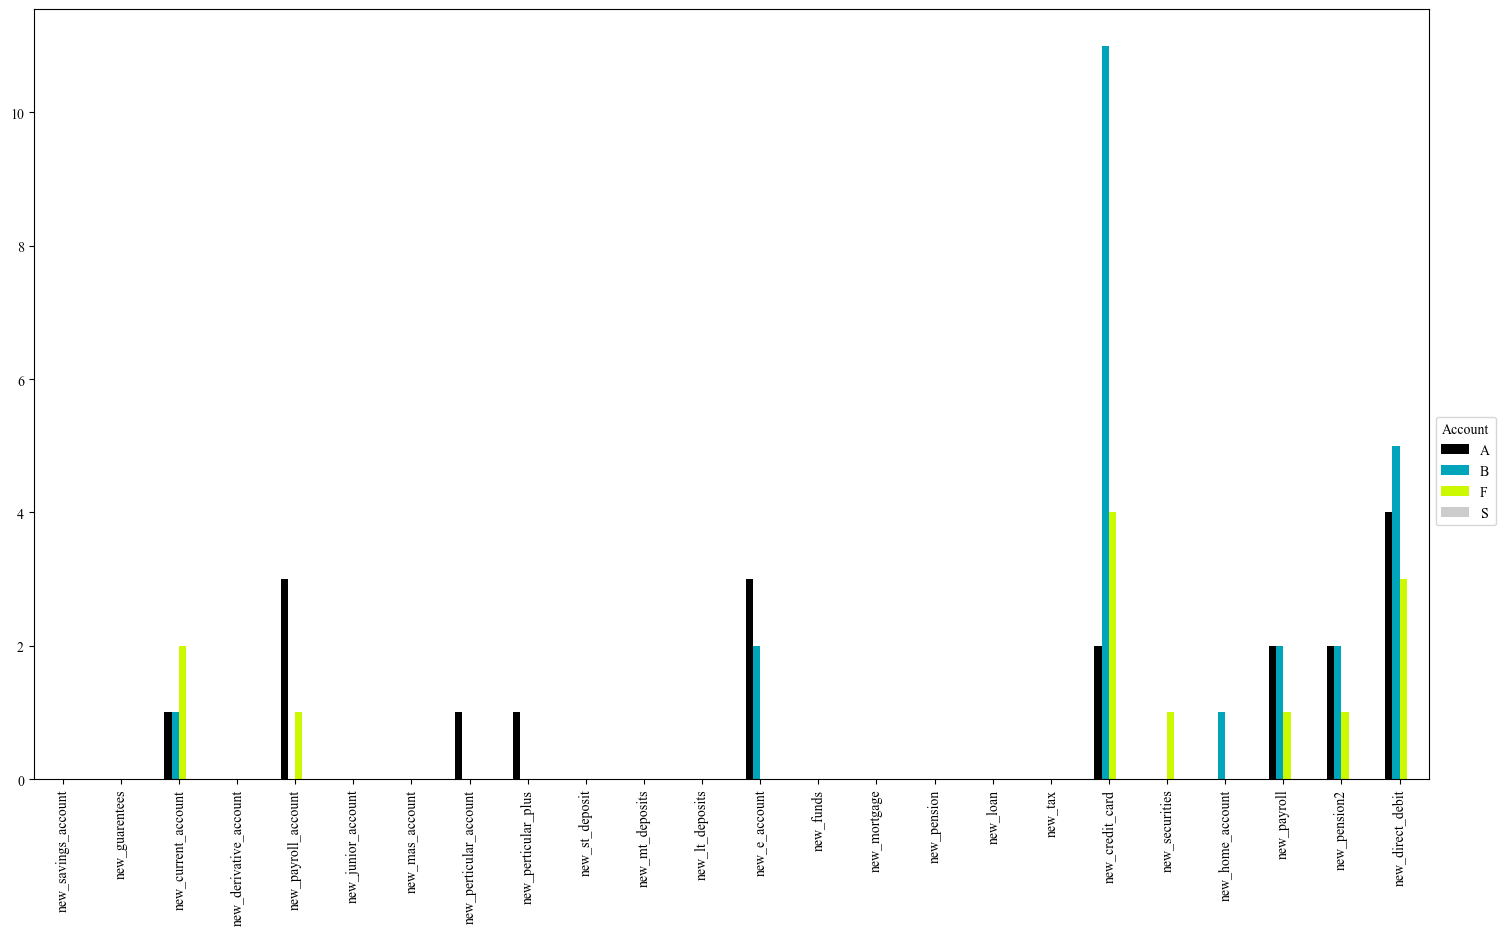

In [19]:
ss = train.drop_duplicates(subset=['cust_code'],keep="last")
ss = ss[ss['emp_index']!='N']
ys = ['savings_account', 'guarentees', 'current_account', 'derivative_account', 'payroll_account', 'junior_account', 'mas_account',
'perticular_account', 'perticular_plus','st_deposit', 'mt_deposits', 'lt_deposits', 'e_account', 'funds', 'mortgage',
 'pension', 'loan', 'tax', 'credit_card', 'securities', 'home_account', 'payroll', 'pension2', 'direct_debit']
new_ys = ['new_'+y for y in ys]
# plotting number of purchases in each month
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
add_account_sum = ss[['emp_index']+new_ys].groupby(['emp_index']).sum().T
add_account_sum.plot(kind='bar',colormap='nipy_spectral',figsize=(18,10))
plt.legend(loc='center left', title='Account', bbox_to_anchor=(1, 0.4))
plt.savefig(path+'v_emp_index_bar.png',bbox_inches='tight')
plt.show()

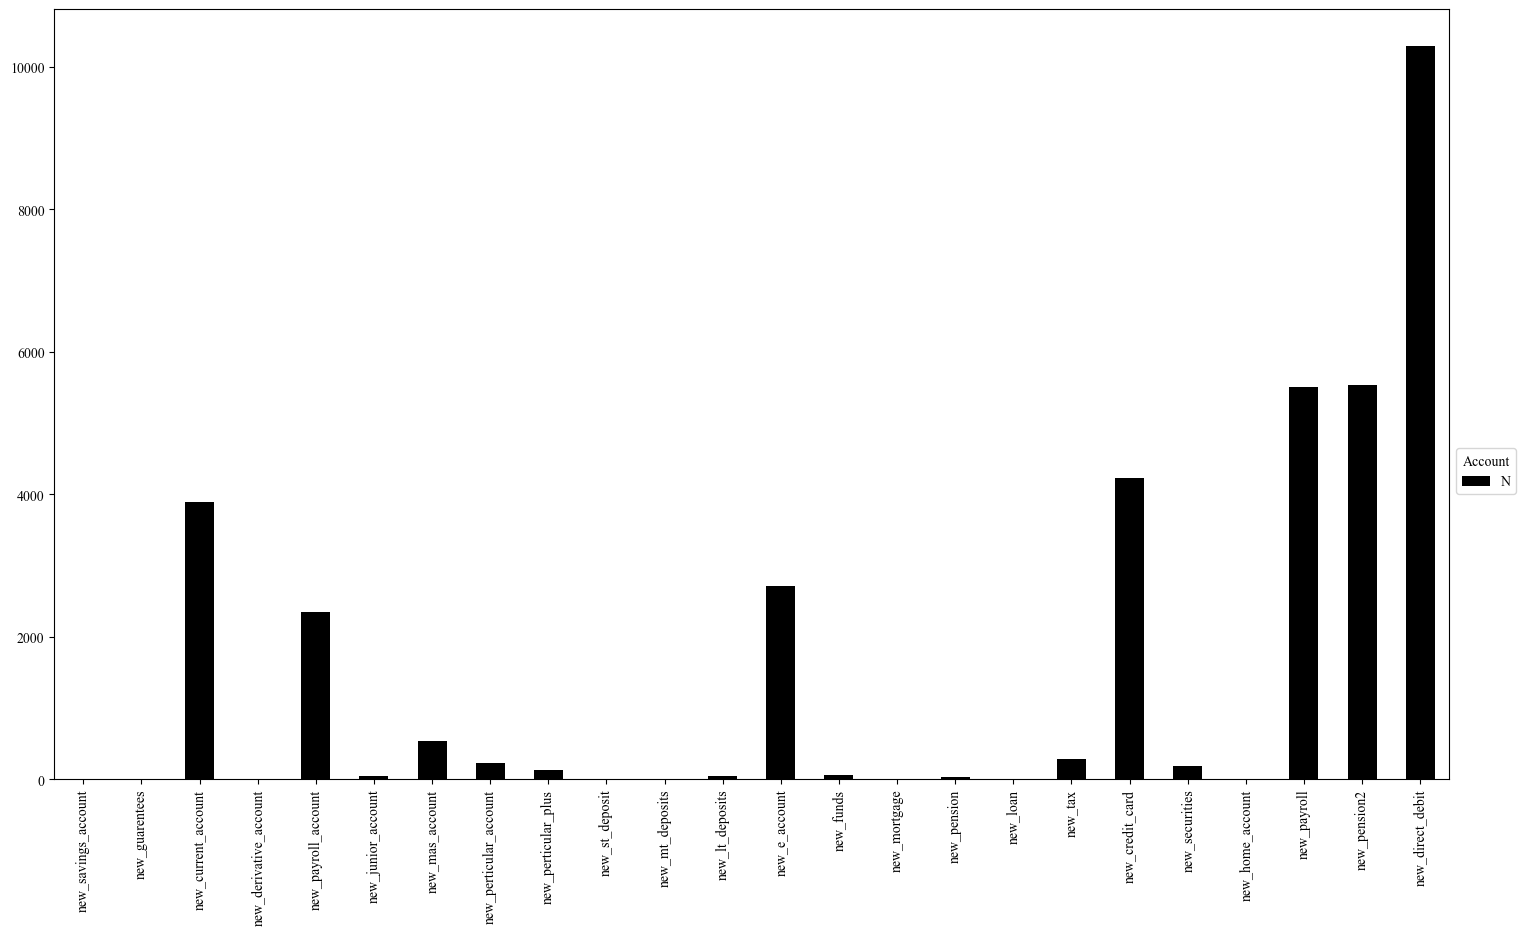

In [26]:
ss = train.drop_duplicates(subset=['cust_code'],keep="last")
ss = ss[ss['emp_index']=='N']
ys = ['savings_account', 'guarentees', 'current_account', 'derivative_account', 'payroll_account', 'junior_account', 'mas_account',
'perticular_account', 'perticular_plus','st_deposit', 'mt_deposits', 'lt_deposits', 'e_account', 'funds', 'mortgage',
 'pension', 'loan', 'tax', 'credit_card', 'securities', 'home_account', 'payroll', 'pension2', 'direct_debit']
new_ys = ['new_'+y for y in ys]
# plotting number of purchases in each month
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
add_account_sum = ss[['emp_index']+new_ys].groupby(['emp_index']).sum()
add_account_sum.T.plot(kind='bar',colormap='nipy_spectral',figsize=(18,10))
plt.legend(loc='center left', title='Account', bbox_to_anchor=(1, 0.4))
plt.savefig(path+'v_emp_index_bar1.png',bbox_inches='tight')
plt.show()

## sex

In [28]:
miss('sex')

100%|██████████| 24/24 [15:23<00:00, 38.46s/it]
/var/folders/t6/n4z3tymj2yg72zy1pjtg4mxm0000gn/T/ipykernel_77562/3358135554.py:22: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex(path+'miss_'+variab+'.tex')


,var,missing_0,missing_1,pct_0(%),pct_1(%)
0,total,20080,NaN,0.15,NaN
1,new_savings_account,20080,0.0,0.15,0.00
2,new_guarentees,20080,0.0,0.15,0.00
3,new_current_account,19961,119.0,0.15,0.17
4,new_derivative_account,20079,1.0,0.15,0.74
5,new_payroll_account,20066,14.0,0.15,0.04
6,new_junior_account,20079,1.0,0.15,0.20
7,new_mas_account,20070,10.0,0.15,0.14
8,new_perticular_account,20074,6.0,0.15,0.15
9,new_perticular_plus,20079,1.0,0.15,0.04


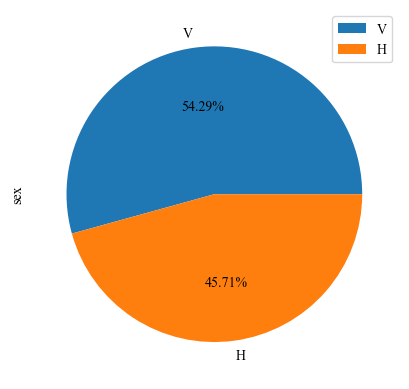

In [29]:
pie_plot('sex')

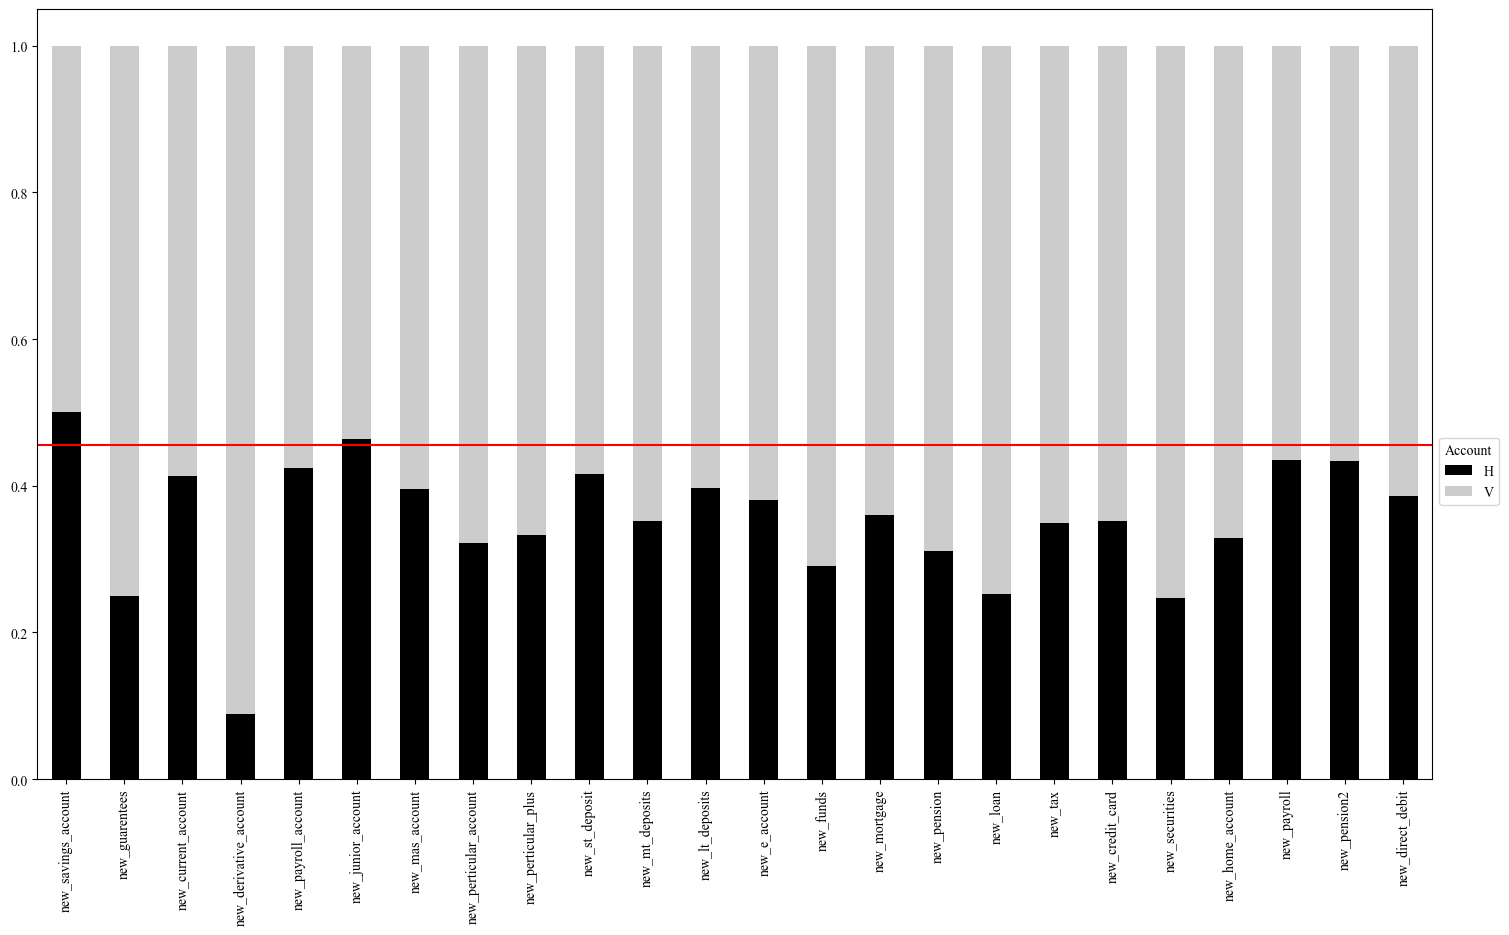

In [38]:
plt.rcParams["font.family"] = "Times New Roman"
add_account_size = train[['sex']+new_ys].groupby(['sex']).size()
add_account_size = add_account_size/add_account_size.sum()
add_account_size.T

add_account_sum = train[['sex']+new_ys].groupby(['sex']).sum()
add_account_sum = add_account_sum/add_account_sum.sum()
add_account_sum.T.plot(kind='bar',stacked=True,colormap='nipy_spectral',figsize=(18,10))
plt.axhline(y=add_account_size[0],color='red')
plt.legend(loc='center left', title='Account', bbox_to_anchor=(1, 0.4))
plt.savefig(path+'v_sex_bar.png',bbox_inches='tight')
plt.show()

In [39]:
add_account_size

sex
H    0.455037
V    0.544963
dtype: float64

## age

In [31]:
miss('age')

100%|██████████| 24/24 [14:45<00:00, 36.90s/it]
/var/folders/t6/n4z3tymj2yg72zy1pjtg4mxm0000gn/T/ipykernel_77562/3358135554.py:22: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex(path+'miss_'+variab+'.tex')


,var,missing_0,missing_1,pct_0(%),pct_1(%)
0,total,20012,NaN,0.15,NaN
1,new_savings_account,20012,0.0,0.15,0.00
2,new_guarentees,20012,0.0,0.15,0.00
3,new_current_account,19893,119.0,0.15,0.17
4,new_derivative_account,20011,1.0,0.15,0.74
5,new_payroll_account,19998,14.0,0.15,0.04
6,new_junior_account,20011,1.0,0.15,0.20
7,new_mas_account,20002,10.0,0.15,0.14
8,new_perticular_account,20006,6.0,0.15,0.15
9,new_perticular_plus,20011,1.0,0.15,0.04


count    949614.000000
mean         40.154128
std          17.170388
min           2.000000
25%          25.000000
50%          38.000000
75%          50.000000
max         164.000000
Name: age, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


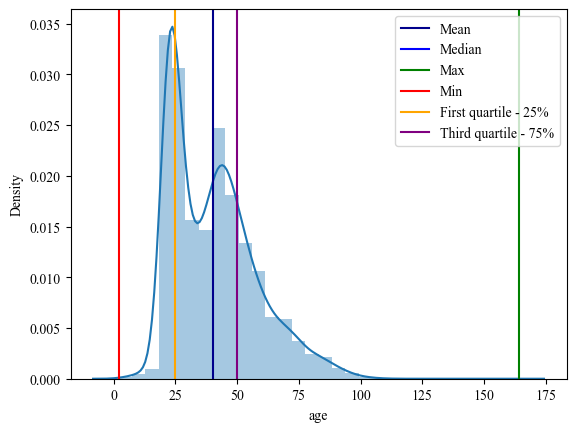

In [22]:
plot_stat('age',bins=30)

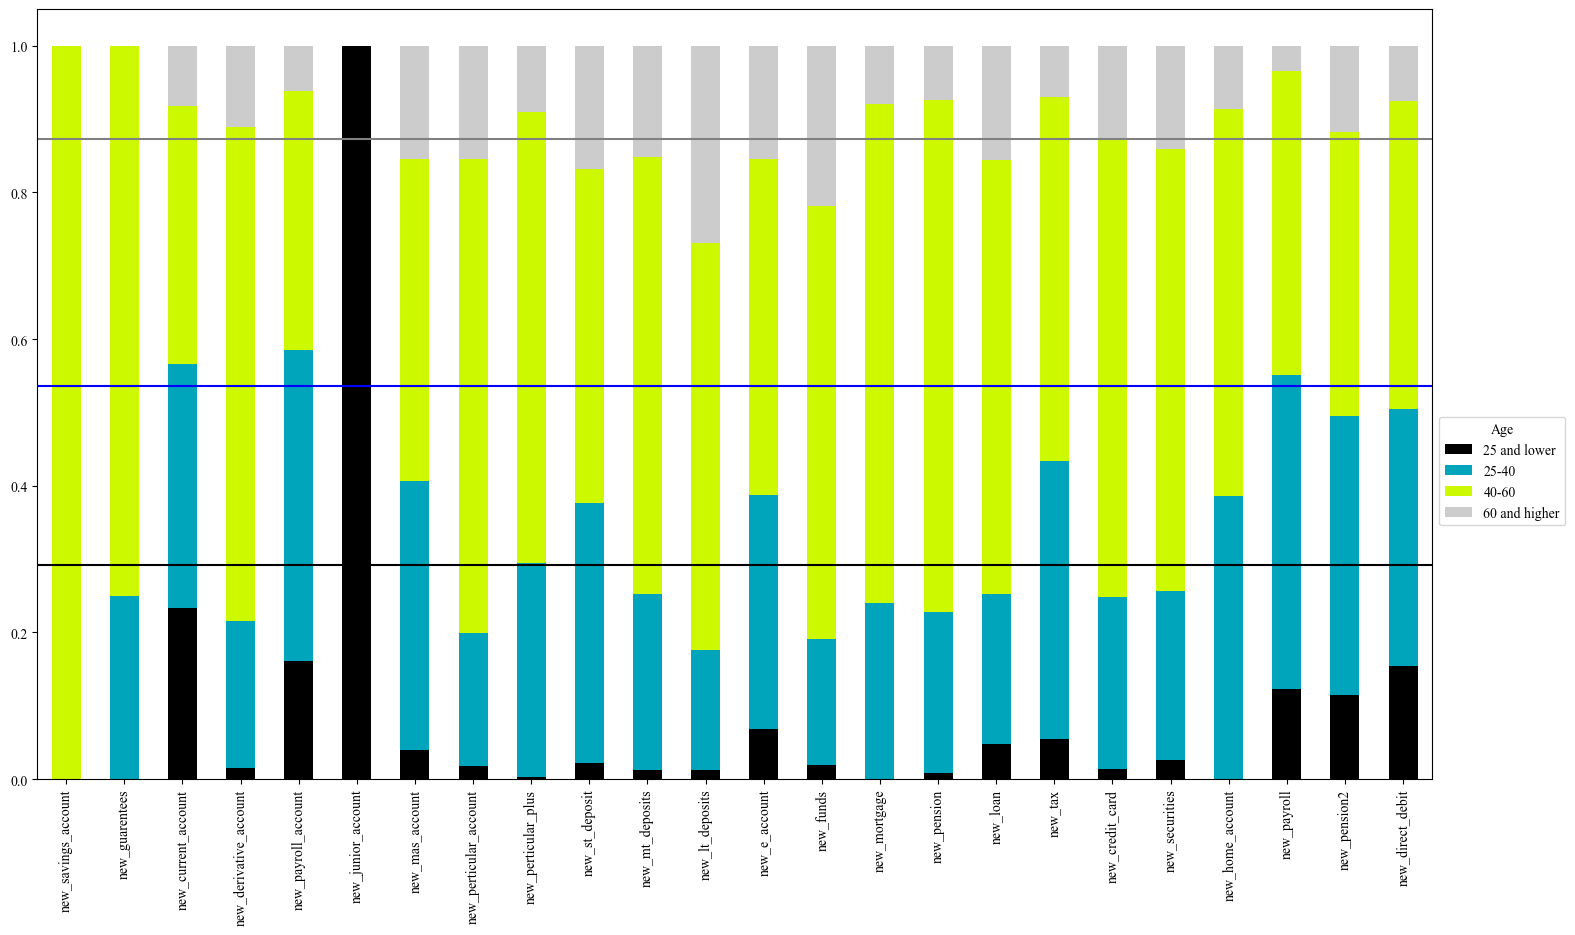

In [63]:
train.loc[train['age']<=25,'age_group'] = "25 and lower"
train.loc[(train['age']>25)&(train['age']<=40),'age_group'] = "25-40"
train.loc[(train['age']>40)&(train['age']<=60),'age_group'] = "40-60"
train.loc[train['age']>60,'age_group'] = "60 and higher"

plt.rcParams["font.family"] = "Times New Roman"
add_account_size = train[['age_group']+new_ys].groupby(['age_group']).size()
add_account_size = add_account_size/add_account_size.sum()
add_account_size.T

add_account_sum = train[['age_group']+new_ys].groupby(['age_group']).sum()
add_account_sum = add_account_sum/add_account_sum.sum()
add_account_sum.T.plot(kind='bar',stacked=True,colormap='nipy_spectral',figsize=(18,10))
plt.axhline(y=add_account_size[0],color='black')
plt.axhline(y=add_account_size[0]+add_account_size[1],color='blue')
plt.axhline(y=add_account_size[0]+add_account_size[1]+add_account_size[2],color='grey')
plt.legend(loc='center left', title='Age', bbox_to_anchor=(1, 0.4))
plt.savefig(path+'v_age_bar.png',bbox_inches='tight')
plt.show()

In [46]:
train.drop(['age_group'],axis=1,inplace=True)

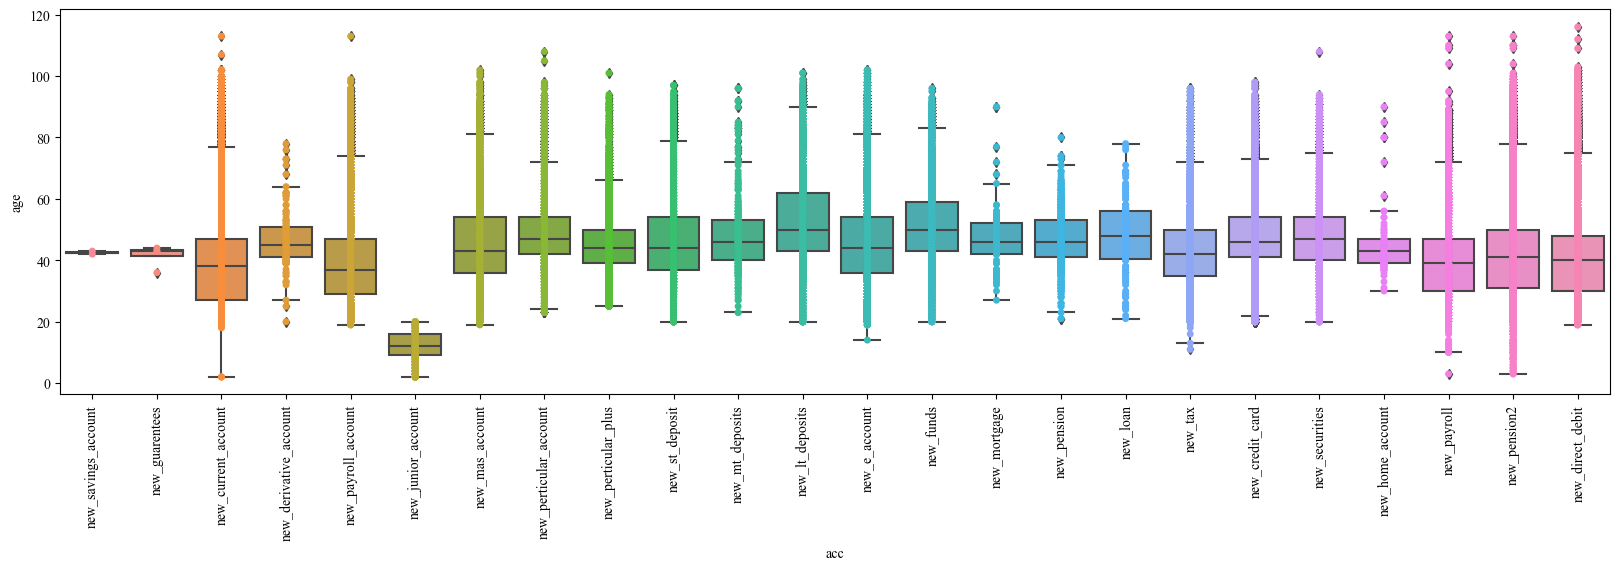

In [49]:
age_buy = pd.DataFrame(columns=['age', 'acc'])
for col in new_ys:
    df = pd.DataFrame({'age':train.age[train[col] == 1],
                     'acc':col})
    age_buy = pd.concat([age_buy, df])

plt.figure(figsize=(20,5))
plt.rcParams["font.family"] = "Times New Roman"
sn.stripplot(x=age_buy.columns[1], y=age_buy.columns[0], data=age_buy, jitter=False, dodge=True)
sn.boxplot(x=age_buy.columns[1], y=age_buy.columns[0], data=age_buy)
plt.xticks(rotation = 90)
plt.savefig(path+'v_age_box.png',bbox_inches='tight')
plt.show()

## new_cust

In [32]:
miss('new_cust')

100%|██████████| 24/24 [14:01<00:00, 35.07s/it]
/var/folders/t6/n4z3tymj2yg72zy1pjtg4mxm0000gn/T/ipykernel_77562/3358135554.py:22: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex(path+'miss_'+variab+'.tex')


,var,missing_0,missing_1,pct_0(%),pct_1(%)
0,total,20012,NaN,0.15,NaN
1,new_savings_account,20012,0.0,0.15,0.00
2,new_guarentees,20012,0.0,0.15,0.00
3,new_current_account,19893,119.0,0.15,0.17
4,new_derivative_account,20011,1.0,0.15,0.74
5,new_payroll_account,19998,14.0,0.15,0.04
6,new_junior_account,20011,1.0,0.15,0.20
7,new_mas_account,20002,10.0,0.15,0.14
8,new_perticular_account,20006,6.0,0.15,0.15
9,new_perticular_plus,20011,1.0,0.15,0.04


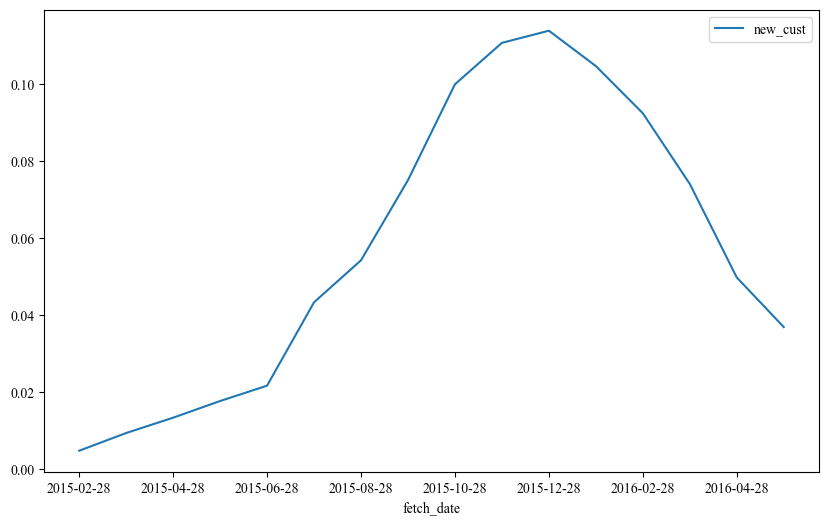

In [62]:
plt.rcParams["font.family"] = "Times New Roman"
add_account_sum = train[['fetch_date','new_cust']].groupby('fetch_date').sum()
add_account_size = train[['fetch_date','new_cust']].groupby('fetch_date').count()
add_account_sum = add_account_sum/add_account_size
add_account_sum.plot(kind='line',figsize=(10,6))
plt.savefig(path+'v_new_cust_date.png',bbox_inches='tight')
plt.show()

new_cust
0.0    0.937565
1.0    0.062435
dtype: float64


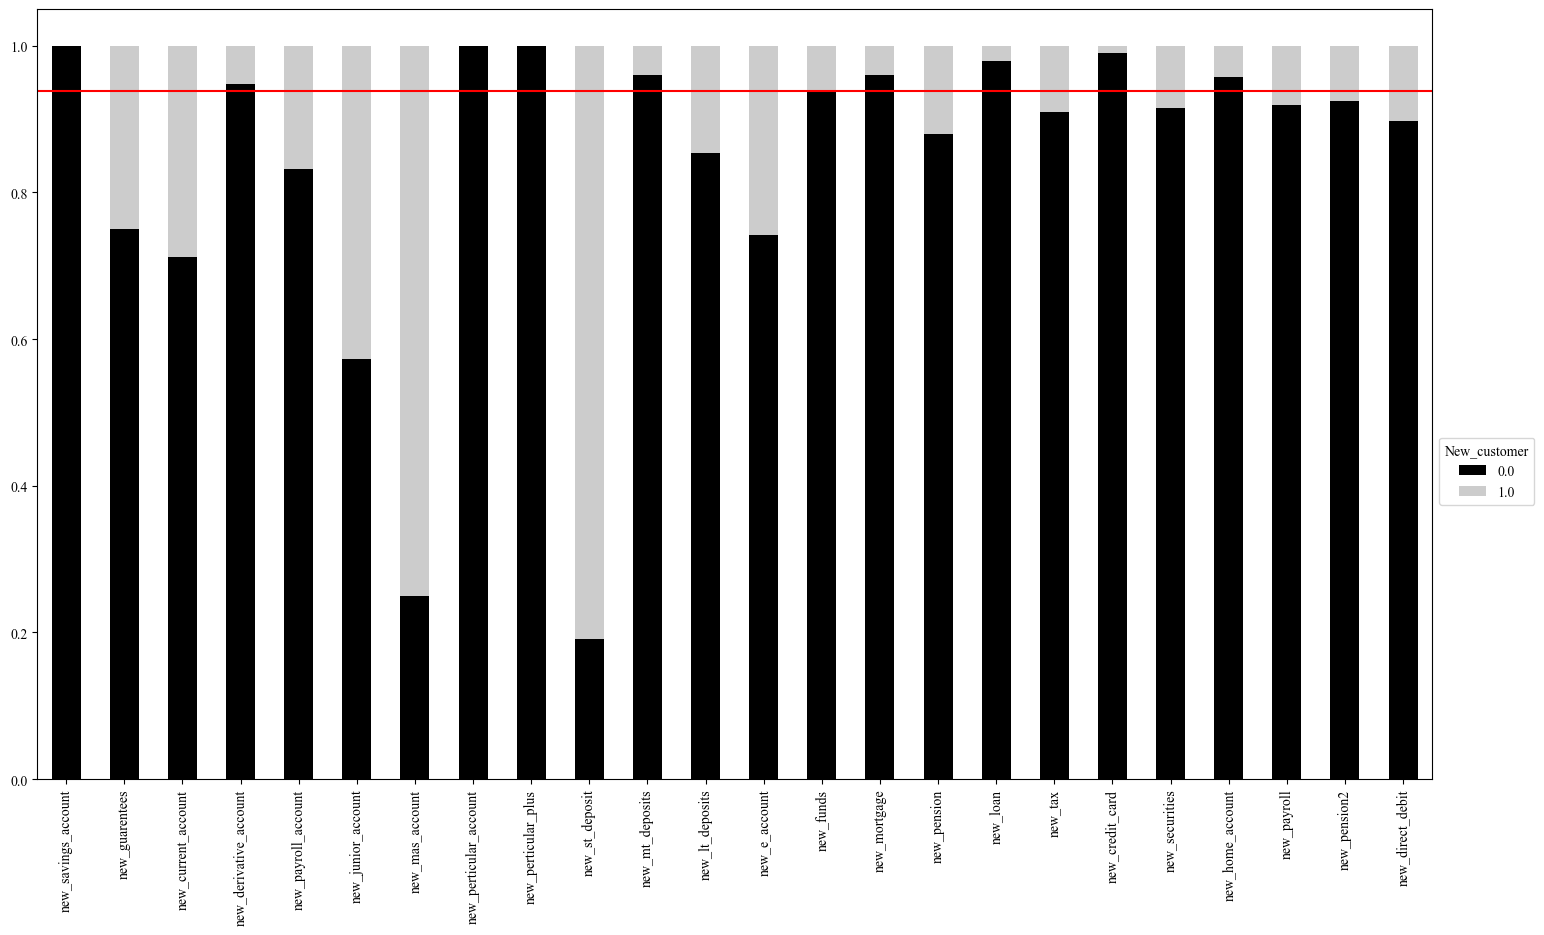

In [66]:
add_account_size = train[['new_cust']+new_ys].groupby(['new_cust']).size()
add_account_size = add_account_size/add_account_size.sum()
print(add_account_size.T)

add_account_sum = train[['new_cust']+new_ys].groupby(['new_cust']).sum()
add_account_sum = add_account_sum/add_account_sum.sum()
add_account_sum.T.plot(kind='bar',stacked=True,colormap='nipy_spectral',figsize=(18,10))
plt.legend(loc='center left', title='New_customer', bbox_to_anchor=(1, 0.4))
plt.axhline(y=add_account_size[0],color='red')
plt.savefig(path+'v_new_cust_bar.png',bbox_inches='tight')
plt.show()

## cust_seniority

In [35]:
miss('cust_seniority')

100%|██████████| 24/24 [45:45<00:00, 114.38s/it] 
/var/folders/t6/n4z3tymj2yg72zy1pjtg4mxm0000gn/T/ipykernel_77562/3358135554.py:22: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex(path+'miss_'+variab+'.tex')


,var,missing_0,missing_1,pct_0(%),pct_1(%)
0,total,20044,NaN,0.15,NaN
1,new_savings_account,20044,0.0,0.15,0.00
2,new_guarentees,20044,0.0,0.15,0.00
3,new_current_account,19925,119.0,0.15,0.17
4,new_derivative_account,20043,1.0,0.15,0.74
5,new_payroll_account,20030,14.0,0.15,0.04
6,new_junior_account,20043,1.0,0.15,0.20
7,new_mas_account,20034,10.0,0.15,0.14
8,new_perticular_account,20038,6.0,0.15,0.15
9,new_perticular_plus,20043,1.0,0.15,0.04


count    949612.000000
mean         78.982443
std          67.323303
min           0.000000
25%          22.000000
50%          53.000000
75%         133.000000
max         256.000000
Name: cust_seniority, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


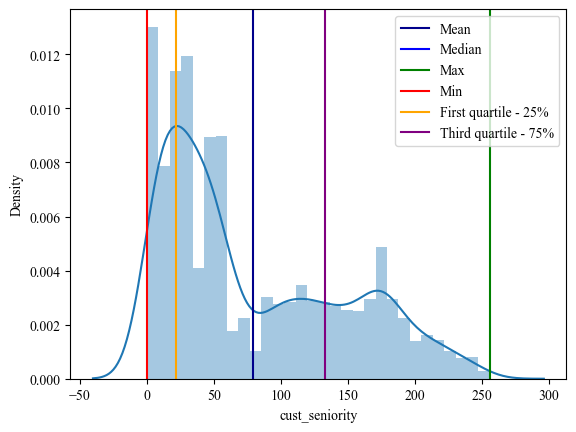

In [67]:
plot_stat('cust_seniority',bins=30)

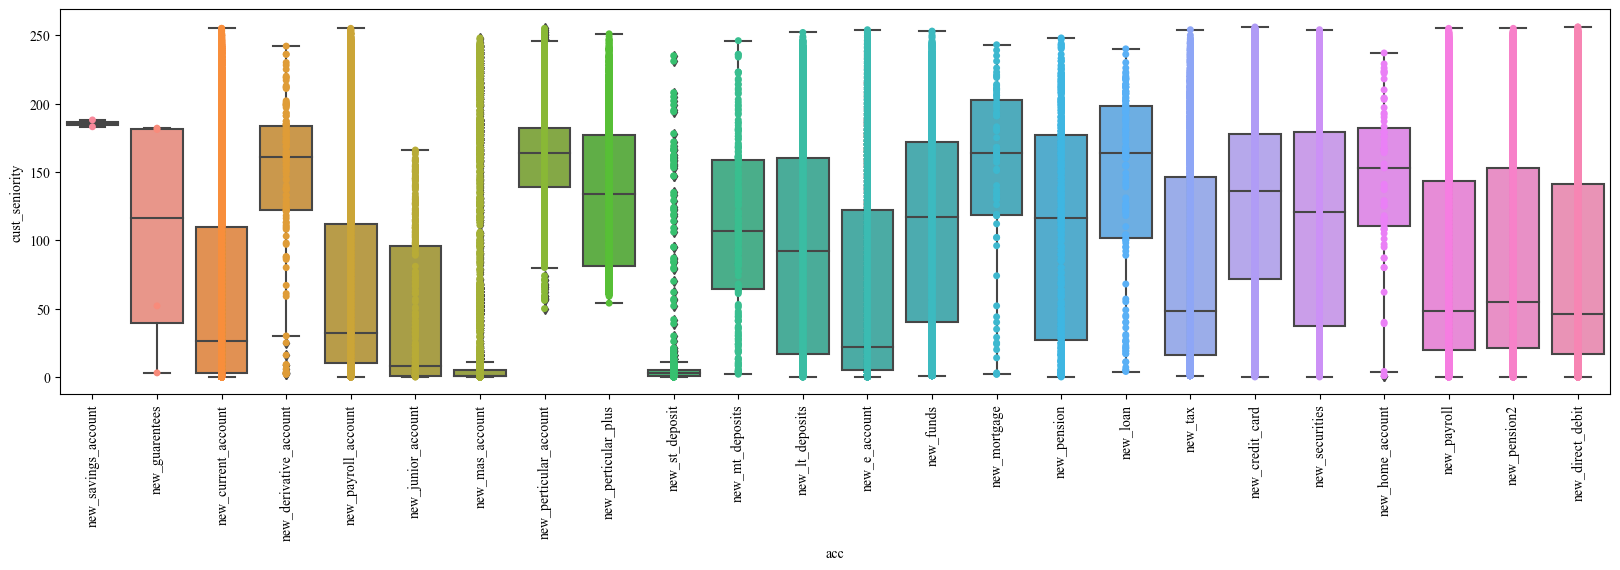

In [69]:
cust_seniority_buy = pd.DataFrame(columns=['cust_seniority', 'acc'])
for col in new_ys:
    df = pd.DataFrame({'cust_seniority':train.cust_seniority[train[col] == 1],
                     'acc':col})
    cust_seniority_buy = pd.concat([cust_seniority_buy, df])

plt.figure(figsize=(20,5))
plt.rcParams["font.family"] = "Times New Roman"
sn.stripplot(x=cust_seniority_buy.columns[1], y=cust_seniority_buy.columns[0], data=cust_seniority_buy, jitter=False, dodge=True)
sn.boxplot(x=cust_seniority_buy.columns[1], y=cust_seniority_buy.columns[0], data=cust_seniority_buy)
plt.xticks(rotation = 90)
plt.savefig(path+'v_cust_seniority_box.png',bbox_inches='tight')
plt.show()

## indrel

In [38]:
miss('indrel')

100%|██████████| 24/24 [24:30<00:00, 61.27s/it] 
/var/folders/t6/n4z3tymj2yg72zy1pjtg4mxm0000gn/T/ipykernel_77562/3358135554.py:22: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex(path+'miss_'+variab+'.tex')


,var,missing_0,missing_1,pct_0(%),pct_1(%)
0,total,20012,NaN,0.15,NaN
1,new_savings_account,20012,0.0,0.15,0.00
2,new_guarentees,20012,0.0,0.15,0.00
3,new_current_account,19893,119.0,0.15,0.17
4,new_derivative_account,20011,1.0,0.15,0.74
5,new_payroll_account,19998,14.0,0.15,0.04
6,new_junior_account,20011,1.0,0.15,0.20
7,new_mas_account,20002,10.0,0.15,0.14
8,new_perticular_account,20006,6.0,0.15,0.15
9,new_perticular_plus,20011,1.0,0.15,0.04


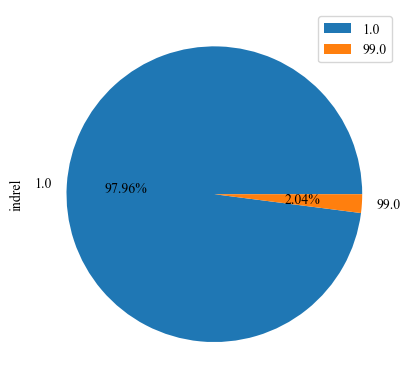

In [73]:
pie_plot('indrel')

## cust_type

In [ ]:
miss('cust_type')

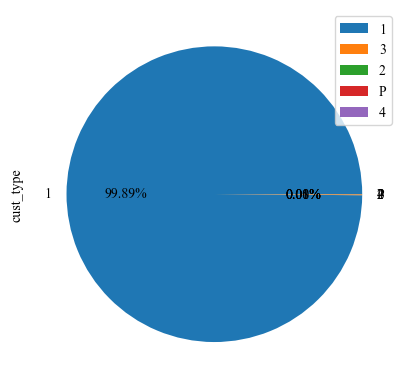

In [79]:
pie_plot('cust_type')

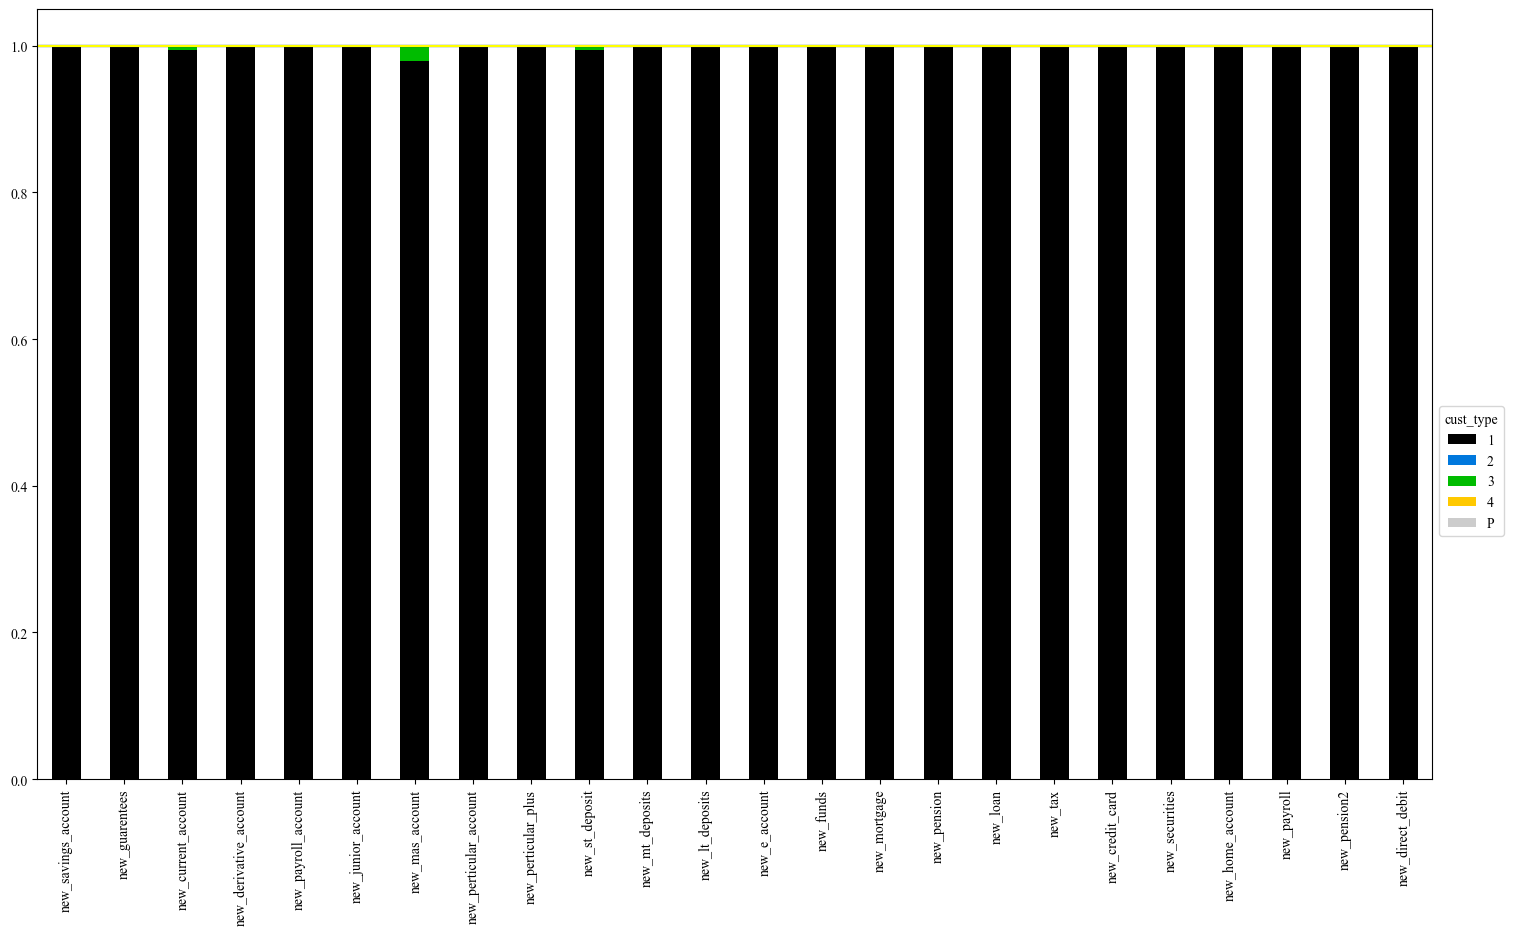

In [78]:
plt.rcParams["font.family"] = "Times New Roman"
add_account_size = train[['cust_type']+new_ys].groupby(['cust_type']).size()
add_account_size = add_account_size/add_account_size.sum()
add_account_size.T

add_account_sum = train[['cust_type']+new_ys].groupby(['cust_type']).sum()
add_account_sum = add_account_sum/add_account_sum.sum()
add_account_sum.T.plot(kind='bar',stacked=True,colormap='nipy_spectral',figsize=(18,10))
plt.axhline(y=add_account_size[0],color='black')
plt.axhline(y=add_account_size[0]+add_account_size[1],color='blue')
plt.axhline(y=add_account_size[0]+add_account_size[1]+add_account_size[2],color='green')
plt.axhline(y=add_account_size[0]+add_account_size[1]+add_account_size[2]+add_account_size[3],color='yellow')
plt.legend(loc='center left', title='cust_type', bbox_to_anchor=(1, 0.4))
plt.savefig(path+'v_cust_type_bar.png',bbox_inches='tight')
plt.show()

## cust_rel

In [37]:
miss('cust_rel')

100%|██████████| 24/24 [30:29<00:00, 76.25s/it]  
/var/folders/t6/n4z3tymj2yg72zy1pjtg4mxm0000gn/T/ipykernel_77562/3358135554.py:22: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex(path+'miss_'+variab+'.tex')


,var,missing_0,missing_1,pct_0(%),pct_1(%)
0,total,27667,NaN,0.21,NaN
1,new_savings_account,27667,0.0,0.21,0.00
2,new_guarentees,27667,0.0,0.21,0.00
3,new_current_account,27548,119.0,0.21,0.17
4,new_derivative_account,27666,1.0,0.21,0.74
5,new_payroll_account,27653,14.0,0.21,0.04
6,new_junior_account,27666,1.0,0.21,0.20
7,new_mas_account,27657,10.0,0.21,0.14
8,new_perticular_account,27661,6.0,0.21,0.15
9,new_perticular_plus,27666,1.0,0.21,0.04


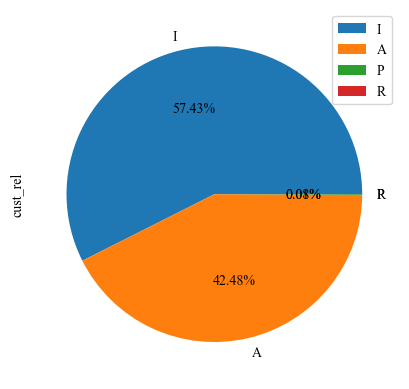

In [80]:
pie_plot('cust_rel')

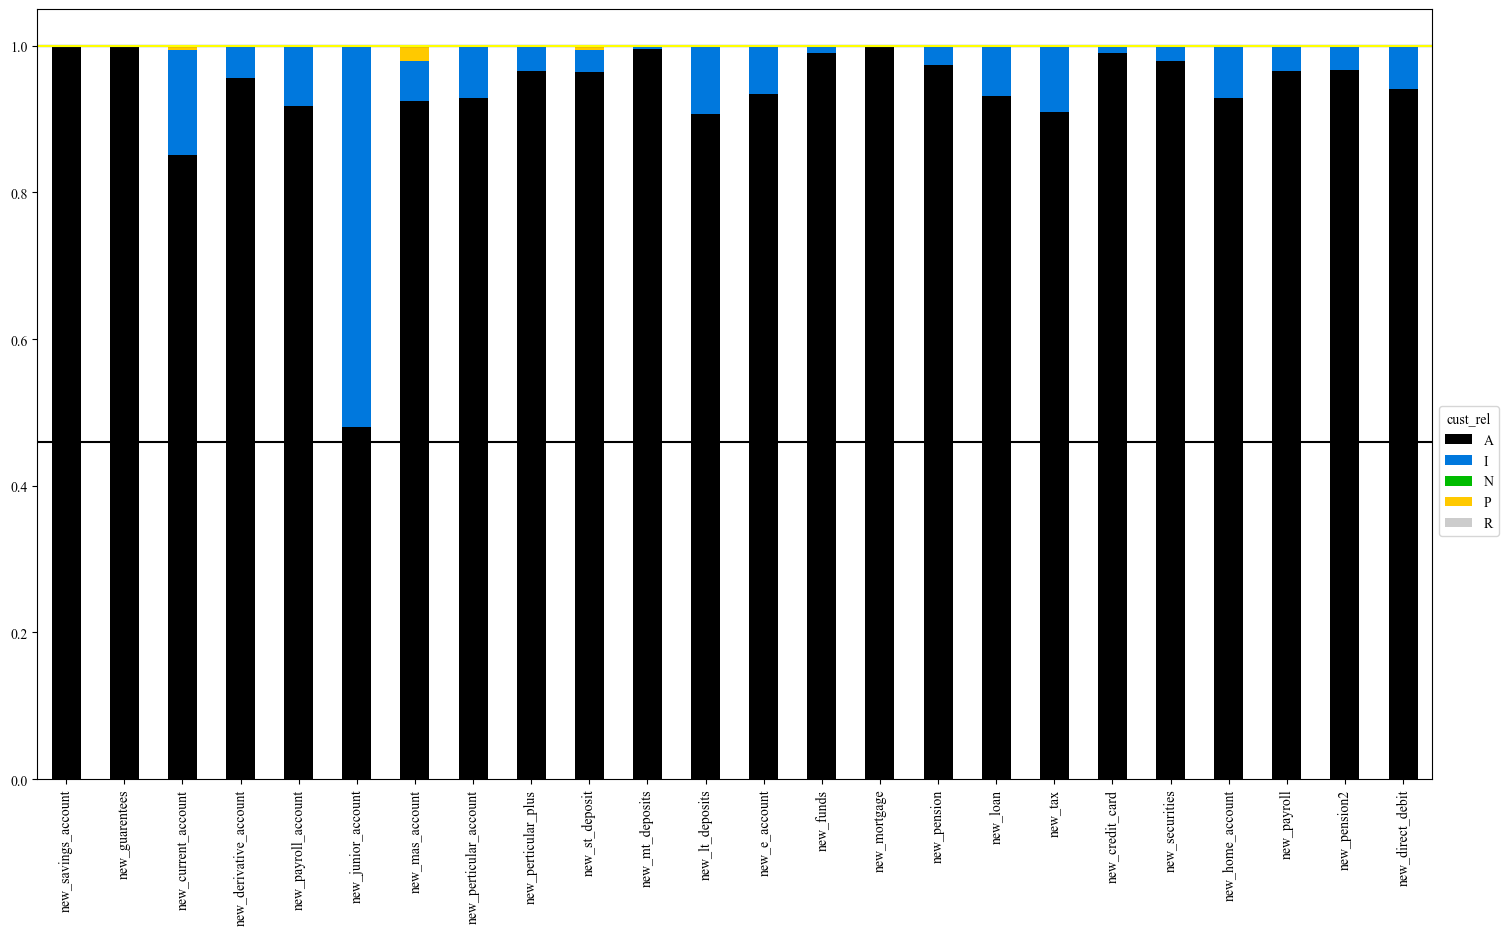

In [75]:
plt.rcParams["font.family"] = "Times New Roman"
add_account_size = train[['cust_rel']+new_ys].groupby(['cust_rel']).size()
add_account_size = add_account_size/add_account_size.sum()
add_account_size.T

add_account_sum = train[['cust_rel']+new_ys].groupby(['cust_rel']).sum()
add_account_sum = add_account_sum/add_account_sum.sum()
add_account_sum.T.plot(kind='bar',stacked=True,colormap='nipy_spectral',figsize=(18,10))
plt.axhline(y=add_account_size[0],color='black')
plt.axhline(y=add_account_size[0]+add_account_size[1],color='blue')
plt.axhline(y=add_account_size[0]+add_account_size[1]+add_account_size[2],color='green')
plt.axhline(y=add_account_size[0]+add_account_size[1]+add_account_size[2]+add_account_size[3],color='yellow')
plt.legend(loc='center left', title='cust_rel', bbox_to_anchor=(1, 0.4))
plt.savefig(path+'v_cust_rel_bar.png',bbox_inches='tight')
plt.show()

In [77]:
add_account_size

cust_rel
A    4.600399e-01
I    5.394730e-01
N    3.078300e-07
P    4.198801e-04
R    6.695303e-05
dtype: float64

## residence_index

In [39]:
miss('residence_index')

100%|██████████| 24/24 [15:27<00:00, 38.66s/it]
/var/folders/t6/n4z3tymj2yg72zy1pjtg4mxm0000gn/T/ipykernel_77562/3358135554.py:22: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex(path+'miss_'+variab+'.tex')


,var,missing_0,missing_1,pct_0(%),pct_1(%)
0,total,20012,NaN,0.15,NaN
1,new_savings_account,20012,0.0,0.15,0.00
2,new_guarentees,20012,0.0,0.15,0.00
3,new_current_account,19893,119.0,0.15,0.17
4,new_derivative_account,20011,1.0,0.15,0.74
5,new_payroll_account,19998,14.0,0.15,0.04
6,new_junior_account,20011,1.0,0.15,0.20
7,new_mas_account,20002,10.0,0.15,0.14
8,new_perticular_account,20006,6.0,0.15,0.15
9,new_perticular_plus,20011,1.0,0.15,0.04


residence_index
N    0.004783
S    0.995217
dtype: float64


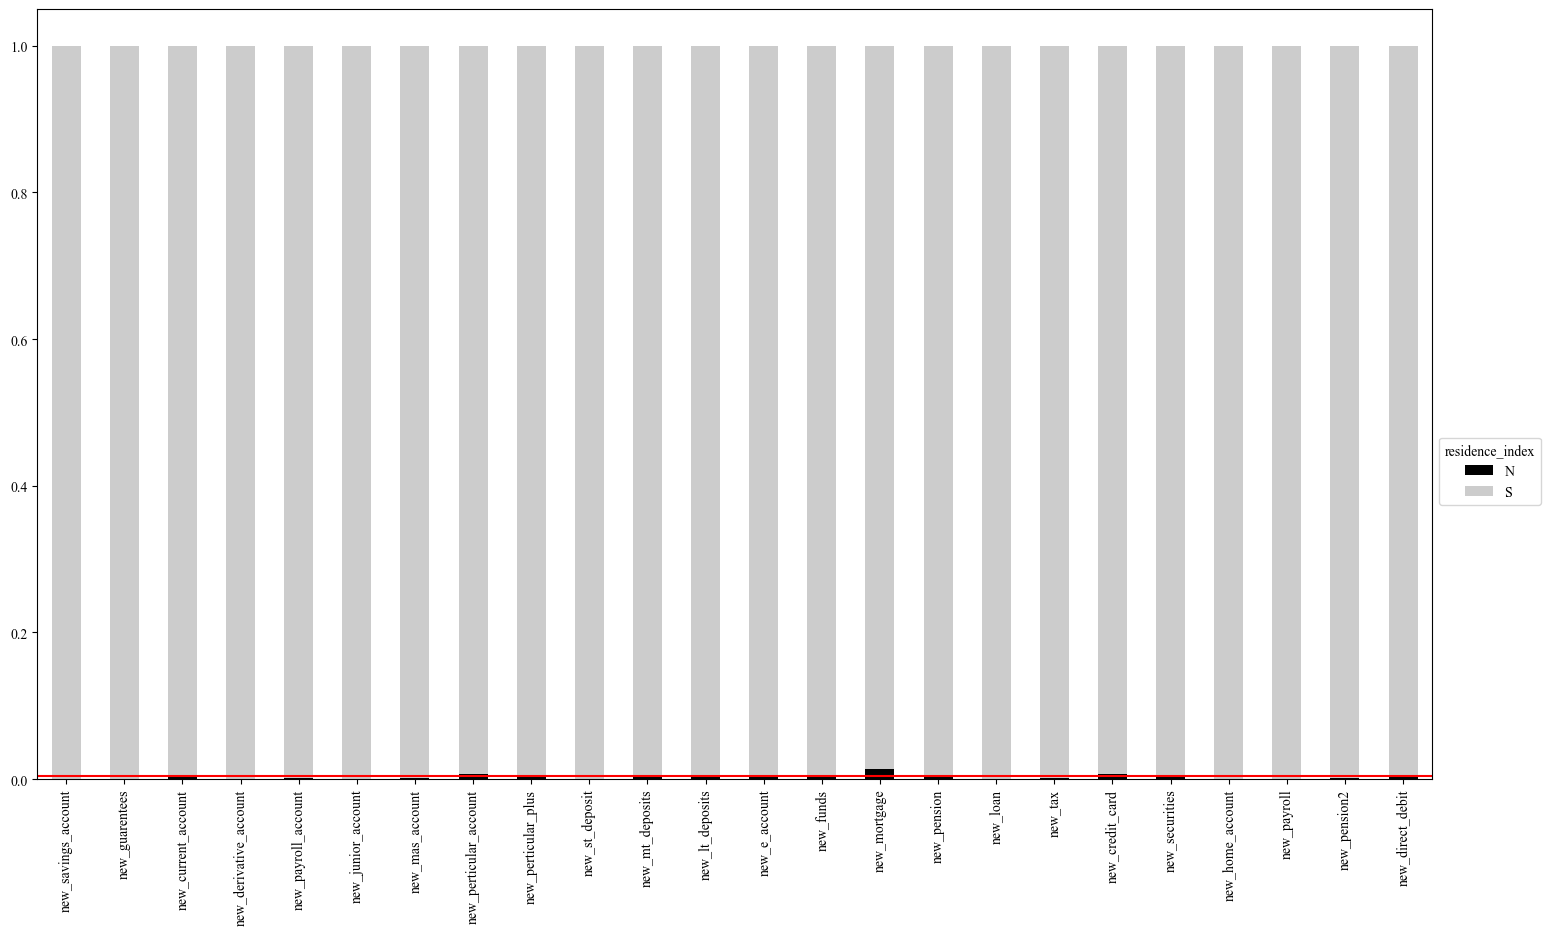

In [81]:
add_account_size = train[['residence_index']+new_ys].groupby(['residence_index']).size()
add_account_size = add_account_size/add_account_size.sum()
print(add_account_size.T)

add_account_sum = train[['residence_index']+new_ys].groupby(['residence_index']).sum()
add_account_sum = add_account_sum/add_account_sum.sum()
add_account_sum.T.plot(kind='bar',stacked=True,colormap='nipy_spectral',figsize=(18,10))
plt.legend(loc='center left', title='residence_index', bbox_to_anchor=(1, 0.4))
plt.axhline(y=add_account_size[0],color='red')
plt.savefig(path+'v_residence_index_bar.png',bbox_inches='tight')
plt.show()

## foreigner_index

In [6]:
miss('foreigner_index')

100%|██████████| 24/24 [15:26<00:00, 38.62s/it]
/var/folders/t6/n4z3tymj2yg72zy1pjtg4mxm0000gn/T/ipykernel_7156/3358135554.py:22: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex(path+'miss_'+variab+'.tex')


,var,missing_0,missing_1,pct_0(%),pct_1(%)
0,total,20012,NaN,0.15,NaN
1,new_savings_account,20012,0.0,0.15,0.00
2,new_guarentees,20012,0.0,0.15,0.00
3,new_current_account,19893,119.0,0.15,0.17
4,new_derivative_account,20011,1.0,0.15,0.74
5,new_payroll_account,19998,14.0,0.15,0.04
6,new_junior_account,20011,1.0,0.15,0.20
7,new_mas_account,20002,10.0,0.15,0.14
8,new_perticular_account,20006,6.0,0.15,0.15
9,new_perticular_plus,20011,1.0,0.15,0.04


foreigner_index
N    0.952486
S    0.047514
dtype: float64


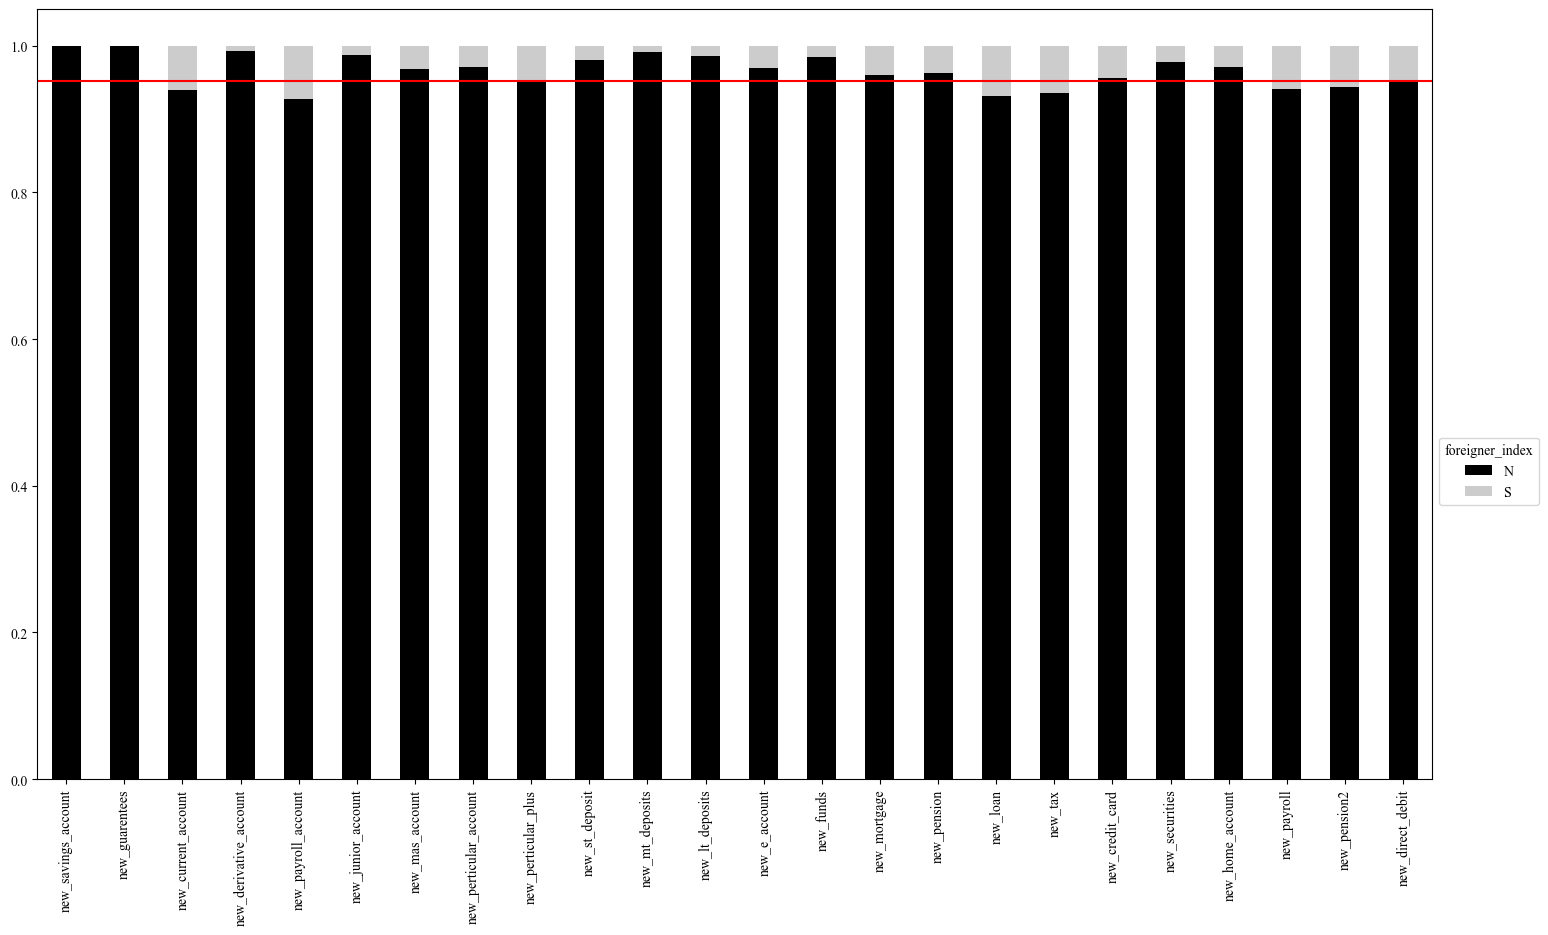

In [82]:
add_account_size = train[['foreigner_index']+new_ys].groupby(['foreigner_index']).size()
add_account_size = add_account_size/add_account_size.sum()
print(add_account_size.T)

add_account_sum = train[['foreigner_index']+new_ys].groupby(['foreigner_index']).sum()
add_account_sum = add_account_sum/add_account_sum.sum()
add_account_sum.T.plot(kind='bar',stacked=True,colormap='nipy_spectral',figsize=(18,10))
plt.legend(loc='center left', title='foreigner_index', bbox_to_anchor=(1, 0.4))
plt.axhline(y=add_account_size[0],color='red')
plt.savefig(path+'v_foreigner_index_bar.png',bbox_inches='tight')
plt.show()

## spouse_index

In [7]:
miss('spouse_index')

100%|██████████| 24/24 [14:37<00:00, 36.55s/it]
/var/folders/t6/n4z3tymj2yg72zy1pjtg4mxm0000gn/T/ipykernel_7156/3358135554.py:22: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex(path+'miss_'+variab+'.tex')


,var,missing_0,missing_1,pct_0(%),pct_1(%)
0,total,13019091,NaN,99.98,NaN
1,new_savings_account,13019089,2.0,99.98,100.00
2,new_guarentees,13019087,4.0,99.98,100.00
3,new_current_account,12949147,69944.0,99.98,99.92
4,new_derivative_account,13018955,136.0,99.98,100.00
5,new_payroll_account,12981929,37162.0,99.98,99.93
6,new_junior_account,13018601,490.0,99.98,100.00
7,new_mas_account,13012112,6979.0,99.98,99.67
8,new_perticular_account,13015215,3876.0,99.98,99.85
9,new_perticular_plus,13016674,2417.0,99.98,99.88


## deceased

In [11]:
miss('deceased')

100%|██████████| 24/24 [15:20<00:00, 38.34s/it]
/var/folders/t6/n4z3tymj2yg72zy1pjtg4mxm0000gn/T/ipykernel_7156/3068157761.py:22: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex(path+'miss_'+variab+'.tex')


,var,missing_0,missing_1,pct_0(%),pct_1(%)
0,total,20012,NaN,0.15,NaN
1,new_savings_account,20012,0.0,0.15,0.00
2,new_guarentees,20012,0.0,0.15,0.00
3,new_current_account,19893,119.0,0.15,0.17
4,new_derivative_account,20011,1.0,0.15,0.74
5,new_payroll_account,19998,14.0,0.15,0.04
6,new_junior_account,20011,1.0,0.15,0.20
7,new_mas_account,20002,10.0,0.15,0.14
8,new_perticular_account,20006,6.0,0.15,0.15
9,new_perticular_plus,20011,1.0,0.15,0.04


deceased
N    0.997448
S    0.002552
dtype: float64


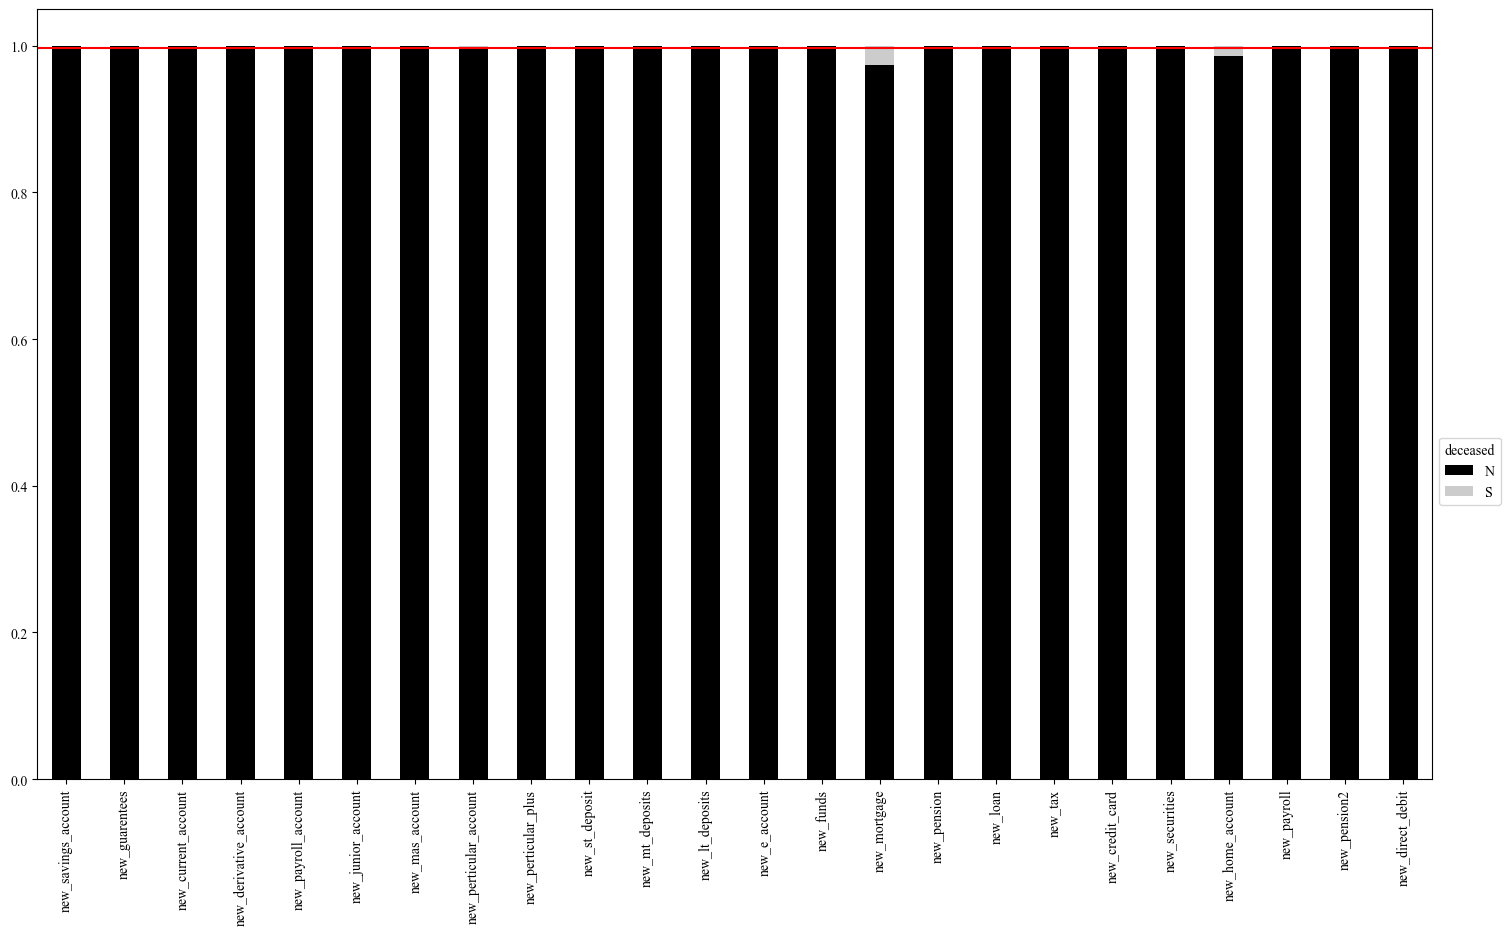

In [83]:
add_account_size = train[['deceased']+new_ys].groupby(['deceased']).size()
add_account_size = add_account_size/add_account_size.sum()
print(add_account_size.T)

add_account_sum = train[['deceased']+new_ys].groupby(['deceased']).sum()
add_account_sum = add_account_sum/add_account_sum.sum()
add_account_sum.T.plot(kind='bar',stacked=True,colormap='nipy_spectral',figsize=(18,10))
plt.legend(loc='center left', title='deceased', bbox_to_anchor=(1, 0.4))
plt.axhline(y=add_account_size[0],color='red')
plt.savefig(path+'v_deceased_bar.png',bbox_inches='tight')
plt.show()

## address_type

In [12]:
miss('address_type')

100%|██████████| 24/24 [14:27<00:00, 36.15s/it]
/var/folders/t6/n4z3tymj2yg72zy1pjtg4mxm0000gn/T/ipykernel_7156/3068157761.py:22: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex(path+'miss_'+variab+'.tex')


,var,missing_0,missing_1,pct_0(%),pct_1(%)
0,total,20012,NaN,0.15,NaN
1,new_savings_account,20012,0.0,0.15,0.00
2,new_guarentees,20012,0.0,0.15,0.00
3,new_current_account,19893,119.0,0.15,0.17
4,new_derivative_account,20011,1.0,0.15,0.74
5,new_payroll_account,19998,14.0,0.15,0.04
6,new_junior_account,20011,1.0,0.15,0.20
7,new_mas_account,20002,10.0,0.15,0.14
8,new_perticular_account,20006,6.0,0.15,0.15
9,new_perticular_plus,20011,1.0,0.15,0.04


## activity_index

In [13]:
miss('activity_index')

100%|██████████| 24/24 [14:23<00:00, 35.99s/it]
/var/folders/t6/n4z3tymj2yg72zy1pjtg4mxm0000gn/T/ipykernel_7156/3068157761.py:22: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex(path+'miss_'+variab+'.tex')


,var,missing_0,missing_1,pct_0(%),pct_1(%)
0,total,20012,NaN,0.15,NaN
1,new_savings_account,20012,0.0,0.15,0.00
2,new_guarentees,20012,0.0,0.15,0.00
3,new_current_account,19893,119.0,0.15,0.17
4,new_derivative_account,20011,1.0,0.15,0.74
5,new_payroll_account,19998,14.0,0.15,0.04
6,new_junior_account,20011,1.0,0.15,0.20
7,new_mas_account,20002,10.0,0.15,0.14
8,new_perticular_account,20006,6.0,0.15,0.15
9,new_perticular_plus,20011,1.0,0.15,0.04


activity_index
0.0    0.545987
1.0    0.454013
dtype: float64


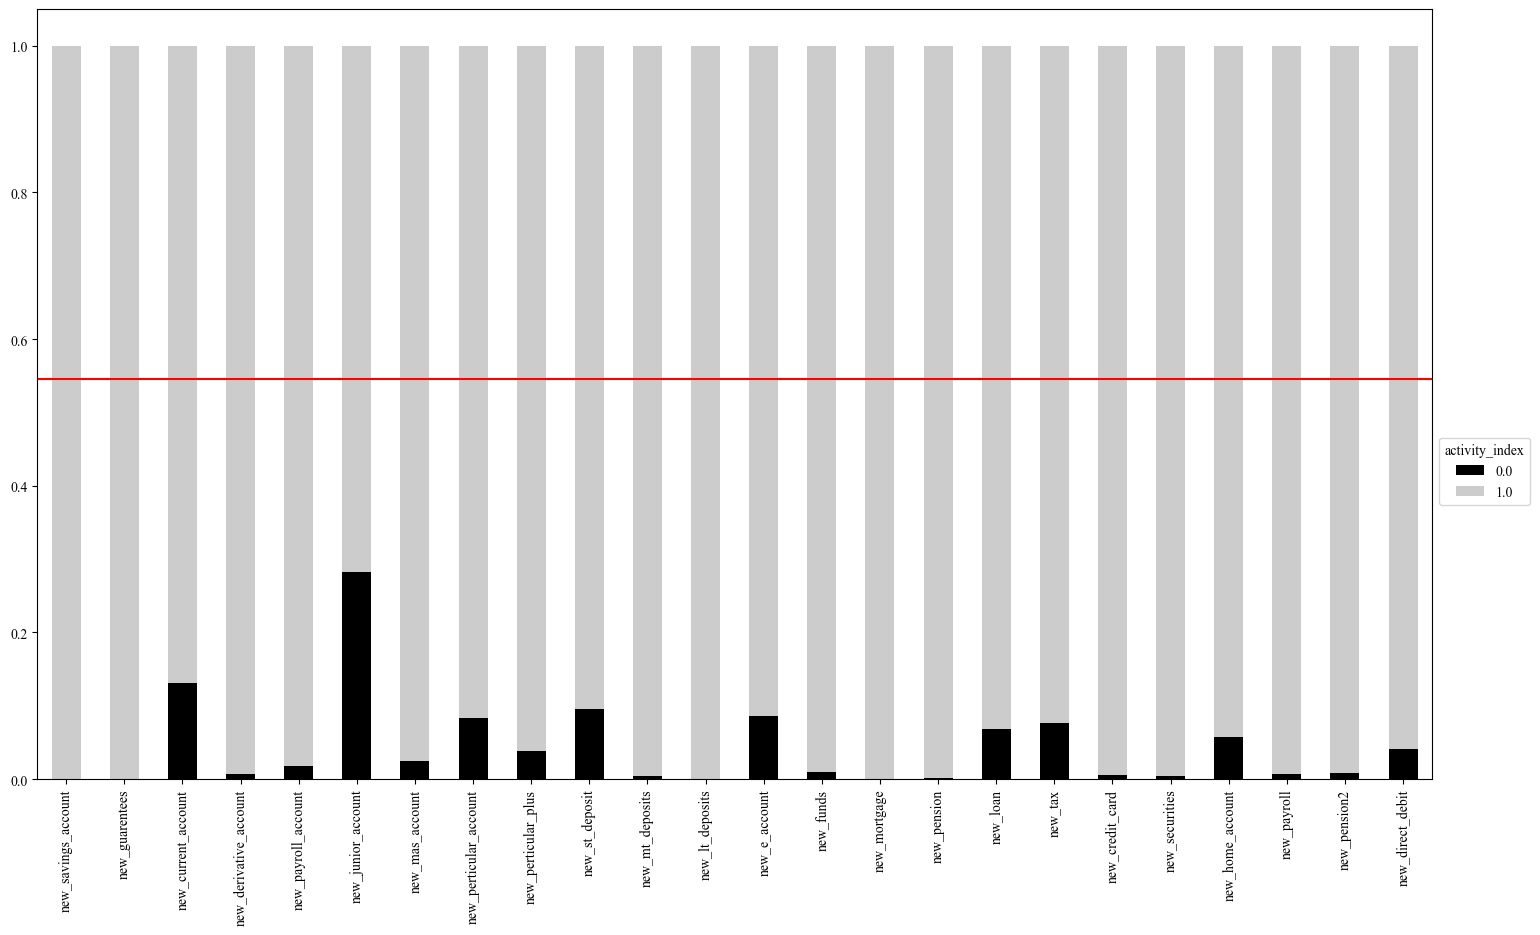

In [86]:
add_account_size = train[['activity_index']+new_ys].groupby(['activity_index']).size()
add_account_size = add_account_size/add_account_size.sum()
print(add_account_size.T)

add_account_sum = train[['activity_index']+new_ys].groupby(['activity_index']).sum()
add_account_sum = add_account_sum/add_account_sum.sum()
add_account_sum.T.plot(kind='bar',stacked=True,colormap='nipy_spectral',figsize=(18,10))
plt.legend(loc='center left', title='activity_index', bbox_to_anchor=(1, 0.4))
plt.axhline(y=add_account_size[0],color='red')
plt.savefig(path+'v_activity_index_bar.png',bbox_inches='tight')
plt.show()

## income

In [14]:
miss('income')

100%|██████████| 24/24 [13:54<00:00, 34.75s/it]
/var/folders/t6/n4z3tymj2yg72zy1pjtg4mxm0000gn/T/ipykernel_7156/3068157761.py:22: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex(path+'miss_'+variab+'.tex')


,var,missing_0,missing_1,pct_0(%),pct_1(%)
0,total,2682663,NaN,20.60,NaN
1,new_savings_account,2682663,0.0,20.60,0.00
2,new_guarentees,2682662,1.0,20.60,25.00
3,new_current_account,2660564,22099.0,20.54,31.57
4,new_derivative_account,2682647,16.0,20.60,11.76
5,new_payroll_account,2674499,8164.0,20.60,21.95
6,new_junior_account,2682465,198.0,20.60,40.41
7,new_mas_account,2678339,4324.0,20.58,61.75
8,new_perticular_account,2682141,522.0,20.60,13.45
9,new_perticular_plus,2682391,272.0,20.60,11.24


count    7.094110e+05
mean     1.340964e+05
std      2.322812e+05
min      1.202730e+03
25%      6.848994e+04
50%      1.014893e+05
75%      1.555271e+05
max      2.889440e+07
Name: income, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


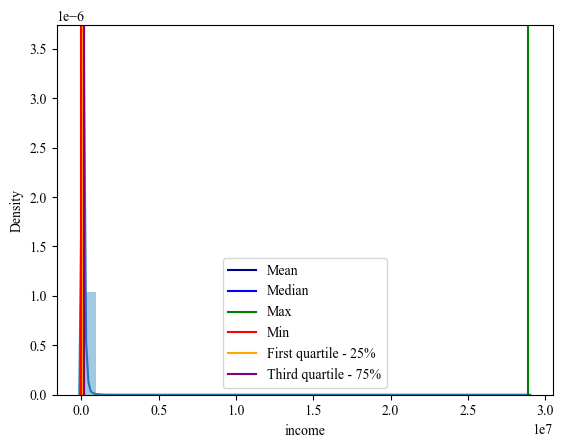

In [85]:
plot_stat('income',bins=30)

In [88]:
print(np.nanquantile(train.income, 0.999))

1538617.86


In [89]:
train.loc[train['income']>np.nanquantile(train.income, 0.999),'income']=np.nanquantile(train.income, 0.999)

count    7.094110e+05
mean     1.308756e+05
std      1.139717e+05
min      1.202730e+03
25%      6.848994e+04
50%      1.014893e+05
75%      1.555271e+05
max      1.538618e+06
Name: income, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


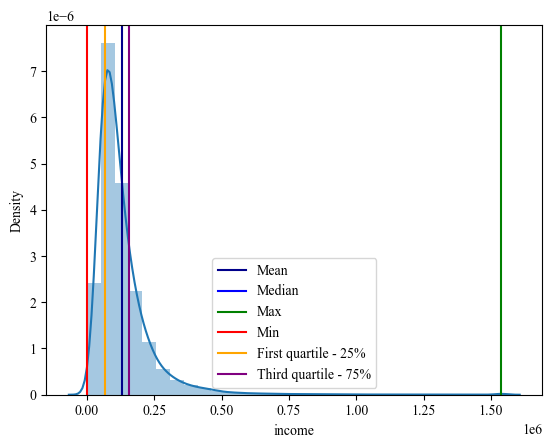

In [90]:
plot_stat('income',bins=30)

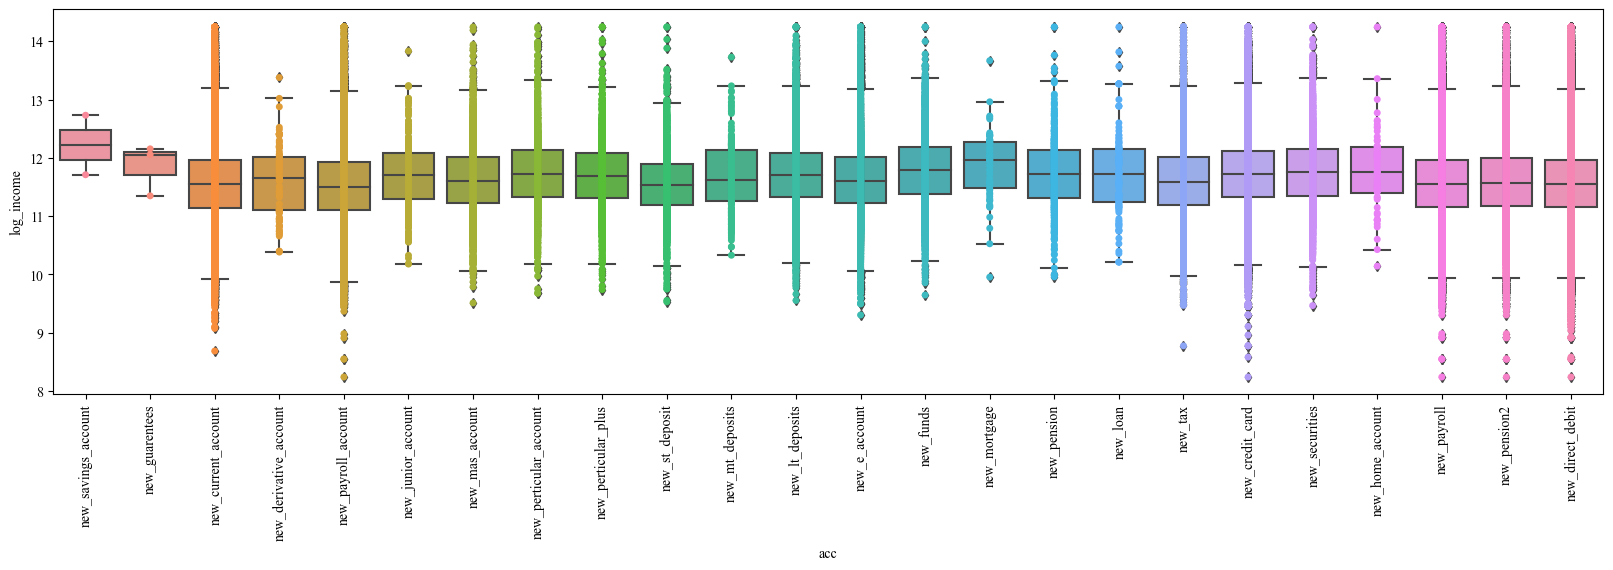

In [94]:
income_buy = pd.DataFrame(columns=['log_income', 'acc'])
for col in new_ys:
    df = pd.DataFrame({'log_income':np.log(train.income[train[col] == 1]),
                     'acc':col})
    income_buy = pd.concat([income_buy, df])

plt.figure(figsize=(20,5))
plt.rcParams["font.family"] = "Times New Roman"
sn.stripplot(x=income_buy.columns[1], y=income_buy.columns[0], data=income_buy, jitter=False, dodge=True)
sn.boxplot(x=income_buy.columns[1], y=income_buy.columns[0], data=income_buy)
plt.xticks(rotation = 90)
plt.savefig(path+'v_income_box.png',bbox_inches='tight')
plt.show()

## segmentation

In [15]:
miss('segmentation')

100%|██████████| 24/24 [13:55<00:00, 34.79s/it]
/var/folders/t6/n4z3tymj2yg72zy1pjtg4mxm0000gn/T/ipykernel_7156/3068157761.py:22: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex(path+'miss_'+variab+'.tex')


,var,missing_0,missing_1,pct_0(%),pct_1(%)
0,total,53710,NaN,0.41,NaN
1,new_savings_account,53710,0.0,0.41,0.00
2,new_guarentees,53710,0.0,0.41,0.00
3,new_current_account,53575,135.0,0.41,0.19
4,new_derivative_account,53709,1.0,0.41,0.74
5,new_payroll_account,53696,14.0,0.41,0.04
6,new_junior_account,53709,1.0,0.41,0.20
7,new_mas_account,53693,17.0,0.41,0.24
8,new_perticular_account,53704,6.0,0.41,0.15
9,new_perticular_plus,53709,1.0,0.41,0.04


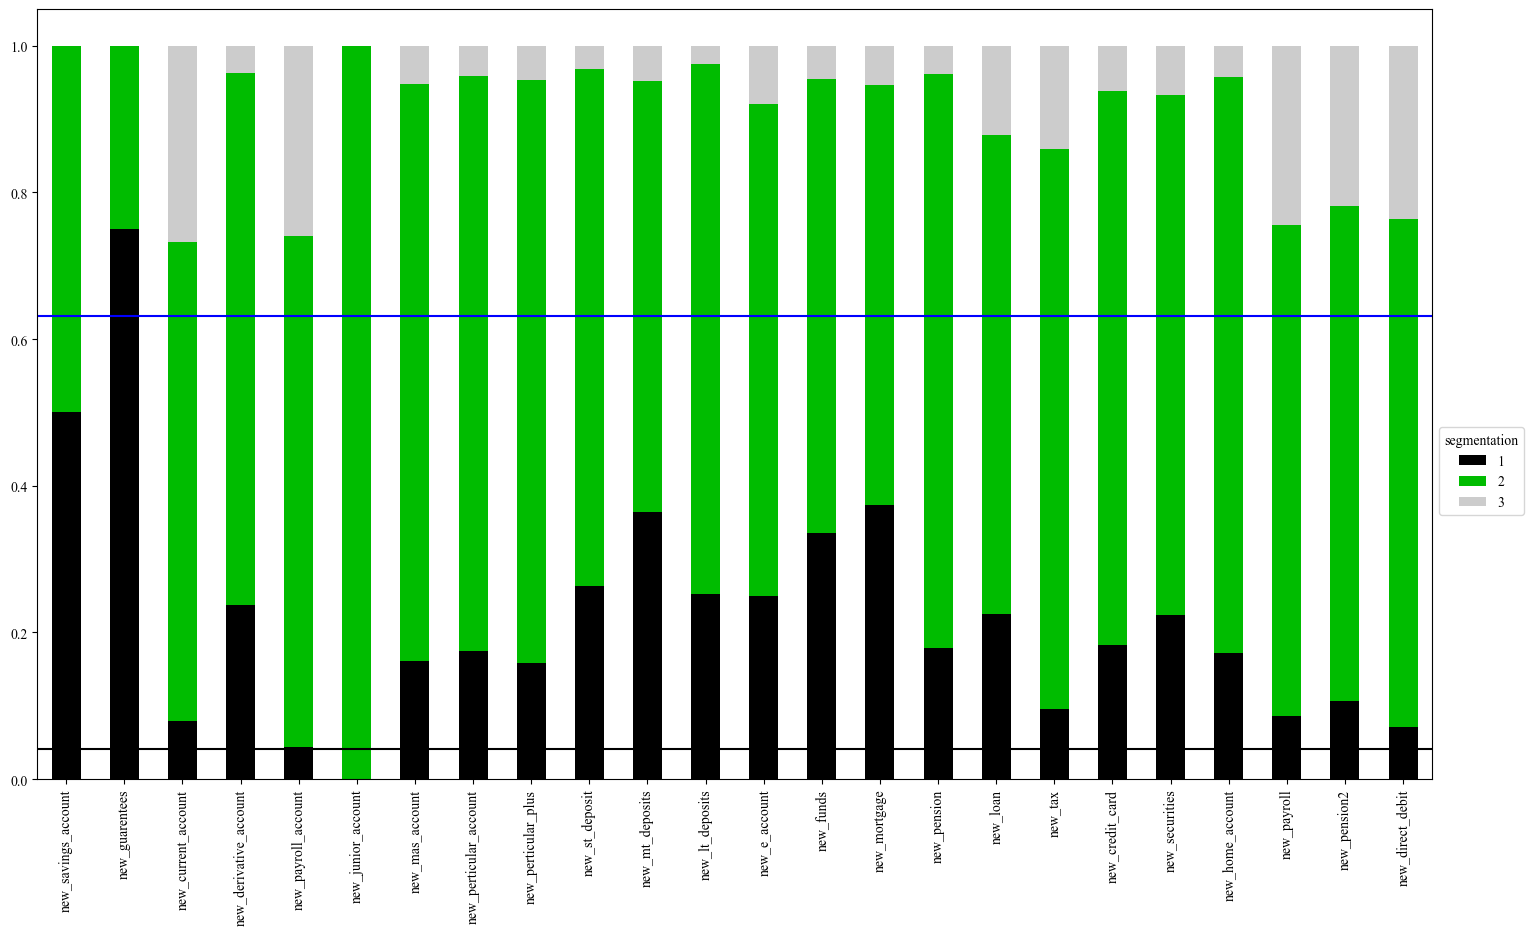

In [97]:
plt.rcParams["font.family"] = "Times New Roman"
add_account_size = train[['segmentation']+new_ys].groupby(['segmentation']).size()
add_account_size = add_account_size/add_account_size.sum()
add_account_size.T

add_account_sum = train[['segmentation']+new_ys].groupby(['segmentation']).sum()
add_account_sum = add_account_sum/add_account_sum.sum()
add_account_sum.T.plot(kind='bar',stacked=True,colormap='nipy_spectral',figsize=(18,10))
plt.axhline(y=add_account_size[1],color='black')
plt.axhline(y=add_account_size[1]+add_account_size[2],color='blue')
plt.legend(loc='center left', title='segmentation', bbox_to_anchor=(1, 0.4))
plt.savefig(path+'v_segmentation_bar.png',bbox_inches='tight')
plt.show()

In [96]:
add_account_size

segmentation
1    0.041158
2    0.589948
3    0.368893
dtype: float64

## Cleaning

In [4]:
train.age[train['age']>100]=100
train.age[train['age']<15]=15
# train.loc[train['income']>np.nanquantile(train.income, 0.999),'income']=np.nanquantile(train.income, 0.999)
train.income = np.log(train.income)

/var/folders/t6/n4z3tymj2yg72zy1pjtg4mxm0000gn/T/ipykernel_40837/2051840534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.age[train['age']>100]=100
/var/folders/t6/n4z3tymj2yg72zy1pjtg4mxm0000gn/T/ipykernel_40837/2051840534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.age[train['age']<15]=15


In [5]:
train.drop(['spouse_index'],axis=1,inplace=True)
train.drop(['address_type'],axis=1,inplace=True)

In [6]:
train.to_pickle(path+'train_examined.pcl')